Q4 test!!!

初始采样取点

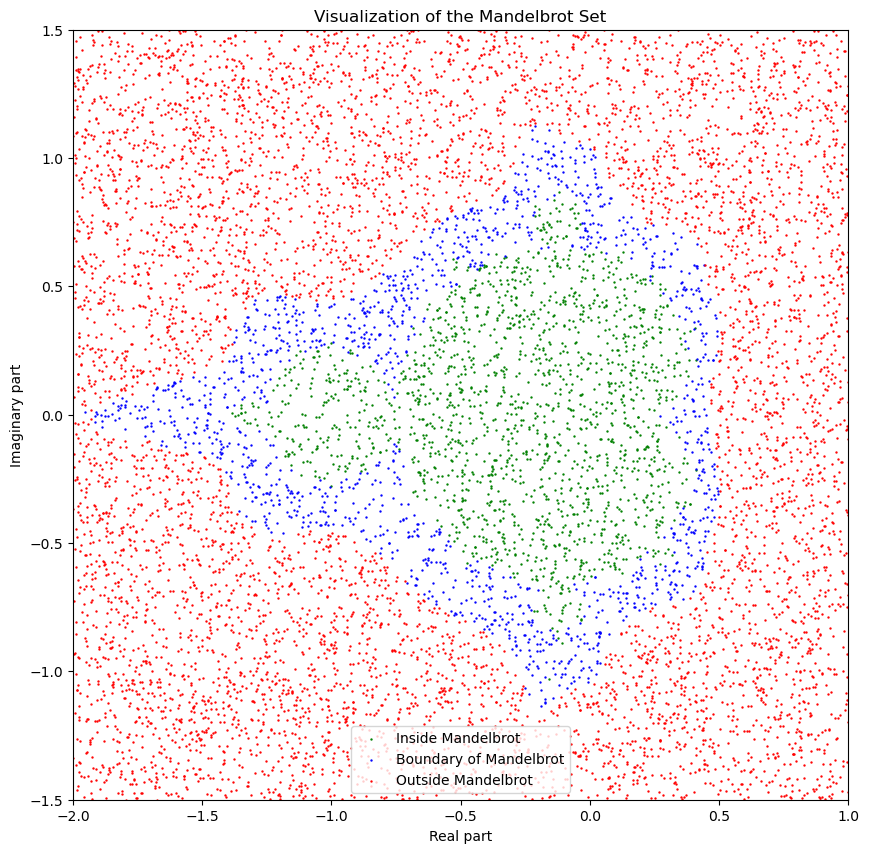

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def random_sampling(x_range, y_range, num_samples):
    real = np.random.uniform(x_range[0], x_range[1], num_samples)
    imag = np.random.uniform(y_range[0], y_range[1], num_samples)
    return real + imag * 1j

def initial_sampling(x_range, y_range, num_samples, max_iter):
    points = random_sampling(x_range, y_range, num_samples)
    stabilities = [mandelbrot(c, max_iter) for c in points]
    inside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if  stability == max_iter]
    boundary_points = [points[i] for i, stability in enumerate(stabilities) if 5 < stability < max_iter]
    outside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability <= 5]
    return np.array(inside_mandelbrot),np.array(boundary_points),np.array(outside_mandelbrot)

x_range = [-2, 1]
y_range = [-1.5, 1.5]
num_samples = 10000
max_iter = 2000

#Acquired boundary point
inside_mandelbrot, boundary_points , outside_mandelbrot= initial_sampling(x_range, y_range, num_samples, max_iter)

plt.figure(figsize=(10, 10))

# Plot each set of points with different colors
plt.scatter(inside_mandelbrot.real, inside_mandelbrot.imag, color='green', s=0.5, label='Inside Mandelbrot')
plt.scatter(boundary_points.real, boundary_points.imag, color='blue', s=0.5, label='Boundary of Mandelbrot')
plt.scatter(outside_mandelbrot.real, outside_mandelbrot.imag, color='red', s=0.5, label='Outside Mandelbrot')

plt.xlim(x_range)
plt.ylim(y_range)
plt.title('Visualization of the Mandelbrot Set')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.legend()
plt.show()


区域可视化

In [55]:
# Given an array of boundary points, and the size of the side length of the boundary region
def define_regions(points, side_length):
    squares = []
    half_side = side_length / 2

    for point in points:
        left = max(point.real - half_side, x_range[0])
        right = min(point.real + half_side, x_range[1])
        bottom = max(point.imag - half_side, y_range[0])
        top = min(point.imag + half_side, y_range[1])

        # 仅当方形在定义的范围内时才添加
        if left < right and bottom < top:
            squares.append([left, right, bottom, top])

    return squares


init_area_of_sample = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
side_length = init_area_of_sample * 0.01
# Use examples
inside_mandelbrot, boundary_points , outside_mandelbrot = initial_sampling(x_range, y_range, num_samples, max_iter)

inside_mandelbrot_squares = define_regions(inside_mandelbrot, side_length)
boundary_squares = define_regions(boundary_points, side_length)  # 0.1 is the length of the side of the square area
outside_mandelbrot_squares = define_regions(outside_mandelbrot, side_length)



# Visualize the area of squares
def visualize_regions(squares, color):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Draw each square
    for square in squares:
        left, right, bottom, top = square
        square_patch = plt.Rectangle((left, bottom), right - left, top - bottom, 
                                     edgecolor=color, facecolor='none')
        ax.add_patch(square_patch)

    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    plt.xlabel('Real part')
    plt.ylabel('Imaginary part')
    plt.title('Regions in the Mandelbrot Set')
    plt.show()

# Visualize each set of regions
#visualize_regions(inside_mandelbrot_squares, 'green')
#visualize_regions(boundary_squares, 'blue')
#visualize_regions(outside_mandelbrot_squares, 'red')


合并三个区域

In [57]:
from shapely.geometry import Polygon
from shapely.geometry import box, Polygon, MultiPolygon
from shapely.ops import unary_union

x_range = [-2, 1]
y_range = [-1.5, 1.5]

# 创建一个矩形多边形
rectangle = box(x_range[0], y_range[0], x_range[1], y_range[1])

# 将矩形多边形包装在一个 MultiPolygon 中
init_space = MultiPolygon([rectangle])

def merge_squares(squares, current_sample_space=init_space):
    polygons = [Polygon([(left, bottom), (right, bottom), (right, top), (left, top)]) for left, right, bottom, top in squares]
    merged_area = unary_union(polygons)

    # 使用intersection方法获取合并区域与current_sample_space的交集
    intersection = merged_area.intersection(current_sample_space)

    if isinstance(intersection, MultiPolygon):
        return intersection
    elif isinstance(intersection, Polygon):
        return MultiPolygon([intersection])
    else:
        return MultiPolygon([])  # 返回空的MultiPolygon对象
    
# 计算每个集合
inside_space = merge_squares(inside_mandelbrot_squares, init_space)
boundary_space = merge_squares(boundary_squares, init_space)
outside_space = merge_squares(outside_mandelbrot_squares, init_space)

print(f"Inside Mandelbrot Set Merged Area: {inside_space.area}")
print(f"Boundary of Mandelbrot Set Merged Area: {boundary_space.area}")
print(f"Outside Mandelbrot Set Merged Area: {outside_space.area}")

print(inside_space)
print(inside_space.area + boundary_space.area + outside_space.area)


Inside Mandelbrot Set Merged Area: 1.8043240091995507
Boundary of Mandelbrot Set Merged Area: 1.8400643147955342
Outside Mandelbrot Set Merged Area: 6.482245525874877
MULTIPOLYGON (((-1.1923696940324668 -0.2282487375858802, -1.1923696940324668 -0.220633701346896, -1.1944315466995916 -0.220633701346896, -1.1944315466995916 -0.2069506376219881, -1.2522458314697822 -0.2069506376219881, -1.2522458314697822 -0.1900404918928341, -1.2566229862693434 -0.1900404918928341, -1.2566229862693434 -0.1050949645764273, -1.2876620955564766 -0.1050949645764273, -1.2876620955564766 -0.1012172526149882, -1.3592286936435363 -0.1012172526149882, -1.3592286936435363 -0.0954069373745075, -1.3913776356923202 -0.0954069373745075, -1.3913776356923202 -0.0427938794675354, -1.3941471252442463 -0.0427938794675354, -1.3941471252442463 0.0472061205324646, -1.3904451375758038 0.0472061205324646, -1.3904451375758038 0.0830592825824755, -1.3528700874380462 0.0830592825824755, -1.3528700874380462 0.0853779242263751, -1.2

处理重合部分并补充没有取样到的部分

In [58]:
def adjust_spaces(inside_space, boundary_space, outside_space, init_space):
    # Step 1: Add intersection with boundary_space to boundary_space
    boundary_inside_intersection = boundary_space.intersection(inside_space)
    boundary_outside_intersection = boundary_space.intersection(outside_space)
    boundary_space = boundary_space.union(boundary_inside_intersection).union(boundary_outside_intersection)

    # Step 2: Remove intersection with boundary_space from inside_space and outside_space
    inside_space = inside_space.difference(boundary_inside_intersection)
    outside_space = outside_space.difference(boundary_outside_intersection)

    # Step 3: Add intersection between inside_space and outside_space to boundary_space
    inside_outside_intersection = inside_space.intersection(outside_space)
    boundary_space = boundary_space.union(inside_outside_intersection)

    # Remove intersections from inside_space and outside_space
    inside_space = inside_space.difference(inside_outside_intersection)
    outside_space = outside_space.difference(inside_outside_intersection)

    # Step 4: Calculate the difference between the union of all spaces and init_space
    union_of_spaces = inside_space.union(boundary_space).union(outside_space)
    difference = union_of_spaces.difference(init_space)

    # Step 5: Add the difference to boundary_space
    boundary_space = boundary_space.union(difference)
    
    return inside_space, boundary_space, outside_space

# Adjust the spaces according to the rules
adjusted_inside_space, adjusted_boundary_space, adjusted_outside_space = adjust_spaces(inside_space, boundary_space, outside_space, init_space)

# Calculate the area of adjusted spaces
adjusted_inside_area = adjusted_inside_space.area
adjusted_boundary_area = adjusted_boundary_space.area
adjusted_outside_area = adjusted_outside_space.area

print(f"Adjusted Inside Mandelbrot Set Area: {adjusted_inside_area}")
print(f"Adjusted Boundary of Mandelbrot Set Area: {adjusted_boundary_area}")
print(f"Adjusted Outside Mandelbrot Set Area: {adjusted_outside_area}")

print(adjusted_inside_space)
print(adjusted_outside_space)
print(adjusted_inside_space.area+adjusted_boundary_space.area+adjusted_outside_space.area)


Adjusted Inside Mandelbrot Set Area: 1.2326030800859904
Adjusted Boundary of Mandelbrot Set Area: 1.8400643147955313
Adjusted Outside Mandelbrot Set Area: 5.925363649307627
MULTIPOLYGON (((-1.1966674370944377 0.1690886065778454, -1.1794957780772222 0.1690886065778454, -1.1794957780772222 0.1706509137285174, -1.1226668879587476 0.1706509137285174, -1.1226668879587476 0.1798321627422481, -1.1165004778707783 0.1798321627422481, -1.1165004778707783 0.2029787890866303, -1.031845575216281 0.2029787890866303, -1.031845575216281 0.2181103917774256, -1.020976889706855 0.2181103917774256, -1.020976889706855 0.2132864102642775, -1.0196198337498334 0.2132864102642775, -1.0196198337498334 0.2102515899081924, -0.9962693921950297 0.2102515899081924, -0.9962693921950297 0.2098176636416204, -0.9388282387987635 0.2098176636416204, -0.9388282387987635 0.1988987913728341, -0.9036479776952794 0.1988987913728341, -0.9036479776952794 0.1645916240902565, -0.8475723547309989 0.1645916240902565, -0.847572354730

可视化第一次迭代后的结果

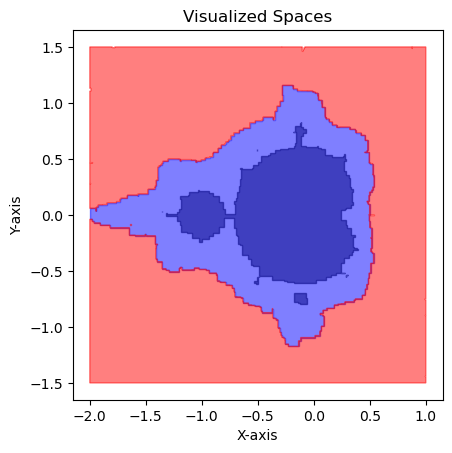

In [67]:
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt

# 更新的可视化函数，允许指定颜色
def visualize_space(merged_rectangles, ax, color='blue'):
    # 如果是单个 Polygon，将其放入一个列表中
    if isinstance(merged_rectangles, Polygon):
        merged_rectangles = [merged_rectangles]
    # 如果是 MultiPolygon，提取每个 Polygon
    elif isinstance(merged_rectangles, MultiPolygon):
        merged_rectangles = [polygon for polygon in merged_rectangles.geoms]

    # 绘制并填充每个多边形
    for polygon in merged_rectangles:
        x, y = polygon.exterior.xy
        ax.fill(x, y, color=color, alpha=0.5)  # 填充外部多边形

# 创建一个新的绘图
fig, ax = plt.subplots()

# 可视化三个区域
visualize_space(adjusted_inside_space, ax, color='black')   # 内部空间为绿色
visualize_space(adjusted_boundary_space, ax, color='blue')  # 边界空间为蓝色
visualize_space(adjusted_outside_space, ax, color='red')    # 外部空间为红色

# 设置图像的x和y边界
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Visualized Spaces')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


进行下一步计算

点采样

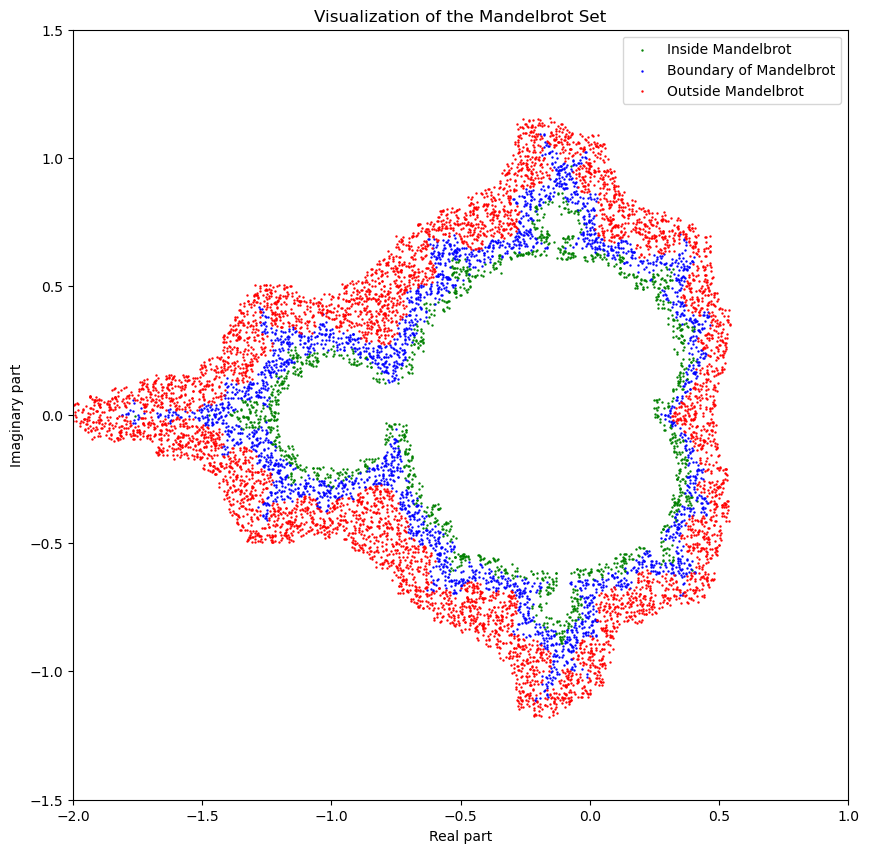

In [154]:
import numpy as np
from shapely.geometry import Point


def random_sampling_within_multipolygon(multipolygon, num_samples):
    """在给定的 MultiPolygon 范围内随机生成点"""
    minx, miny, maxx, maxy = multipolygon.bounds
    points = []
    while len(points) < num_samples:
        real = np.random.uniform(minx, maxx)
        imag = np.random.uniform(miny, maxy)
        point = Point(real, imag)  # 创建一个 Point 对象
        if multipolygon.contains(point):
            complex_point = real + imag * 1j  # 创建一个复数
            points.append(complex_point)
    return points


def random_sampling(multipolygon, num_samples, max_iter, iteration_threshold):
    points = random_sampling_within_multipolygon(multipolygon, num_samples)
    stabilities = [mandelbrot(c, max_iter) for c in points]
    inside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability == max_iter]
    boundary_points = [points[i] for i, stability in enumerate(stabilities) if iteration_threshold < stability < max_iter]
    outside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability <= iteration_threshold]
    return np.array(inside_mandelbrot), np.array(boundary_points), np.array(outside_mandelbrot)

num_samples = 10000
max_iter = 2000
iteration_threshold = 10
current_sample_space = adjusted_boundary_space
# 进行采样
inside_mandelbrot, boundary_points , outside_mandelbrot= random_sampling(adjusted_boundary_space, num_samples, max_iter, iteration_threshold)

plt.figure(figsize=(10, 10))

# Plot each set of points with different colors
plt.scatter(inside_mandelbrot.real, inside_mandelbrot.imag, color='green', s=0.5, label='Inside Mandelbrot')
plt.scatter(boundary_points.real, boundary_points.imag, color='blue', s=0.5, label='Boundary of Mandelbrot')
plt.scatter(outside_mandelbrot.real, outside_mandelbrot.imag, color='red', s=0.5, label='Outside Mandelbrot')

plt.xlim(x_range)
plt.ylim(y_range)
plt.title('Visualization of the Mandelbrot Set')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.legend()
plt.show()



区域可视化

In [155]:
# Given an array of boundary points, and the size of the side length of the boundary region
def define_regions(points, side_length):
    squares = []
    half_side = side_length / 2

    for point in points:
        left = max(point.real - half_side, x_range[0])
        right = min(point.real + half_side, x_range[1])
        bottom = max(point.imag - half_side, y_range[0])
        top = min(point.imag + half_side, y_range[1])

        # 仅当方形在定义的范围内时才添加
        if left < right and bottom < top:
            squares.append([left, right, bottom, top])

    return squares

num_samples = 20000
init_area_of_sample = current_sample_space.area
print(current_sample_space.area)
side_length = init_area_of_sample * 0.01
# Use examples
inside_mandelbrot, boundary_points , outside_mandelbrot= random_sampling(adjusted_boundary_space, num_samples, max_iter, iteration_threshold)

inside_mandelbrot_squares = define_regions(inside_mandelbrot, side_length)
boundary_squares = define_regions(boundary_points, side_length)  # 0.1 is the length of the side of the square area
outside_mandelbrot_squares = define_regions(outside_mandelbrot, side_length)



# Visualize the area of squares
def visualize_regions(squares, color):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Draw each square
    for square in squares:
        left, right, bottom, top = square
        square_patch = plt.Rectangle((left, bottom), right - left, top - bottom, 
                                     edgecolor=color, facecolor='none')
        ax.add_patch(square_patch)

    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    plt.xlabel('Real part')
    plt.ylabel('Imaginary part')
    plt.title('Regions in the Mandelbrot Set')
    plt.show()

# Visualize each set of regions
visualize_regions(inside_mandelbrot_squares, 'green')
visualize_regions(boundary_squares, 'blue')
visualize_regions(outside_mandelbrot_squares, 'red')


1.8424860395099811


合并区域

In [156]:
inside_space = merge_squares(inside_mandelbrot_squares,current_sample_space)
boundary_space = merge_squares(boundary_squares,current_sample_space)
outside_space = merge_squares(outside_mandelbrot_squares,current_sample_space)

print(f"Inside Mandelbrot Set Merged Area: {inside_space.area}")
print(f"Boundary of Mandelbrot Set Merged Area: {boundary_space.area}")
print(f"Outside Mandelbrot Set Merged Area: {outside_space.area}")

print(inside_space.area + boundary_space.area + outside_space.area)

Inside Mandelbrot Set Merged Area: 0.3117897787338945
Boundary of Mandelbrot Set Merged Area: 0.6029225134868056
Outside Mandelbrot Set Merged Area: 1.0792230209146447
1.9939353131353448


处理重合

In [157]:
# Adjust the spaces according to the rules
adjusted_inside_space, adjusted_boundary_space, adjusted_outside_space = adjust_spaces(inside_space, boundary_space, outside_space,current_sample_space)

# Calculate the area of adjusted spaces
adjusted_inside_area = adjusted_inside_space.area
adjusted_boundary_area = adjusted_boundary_space.area
adjusted_outside_area = adjusted_outside_space.area

print(f"Adjusted Inside Mandelbrot Set Area: {adjusted_inside_area}")
print(f"Adjusted Boundary of Mandelbrot Set Area: {adjusted_boundary_area}")
print(f"Adjusted Outside Mandelbrot Set Area: {adjusted_outside_area}")

print(adjusted_inside_space.area+adjusted_boundary_space.area+adjusted_outside_space.area)

Adjusted Inside Mandelbrot Set Area: 0.2133528664722604
Adjusted Boundary of Mandelbrot Set Area: 0.6029299018518937
Adjusted Outside Mandelbrot Set Area: 0.9717767954552782
1.788059563779432


可视化

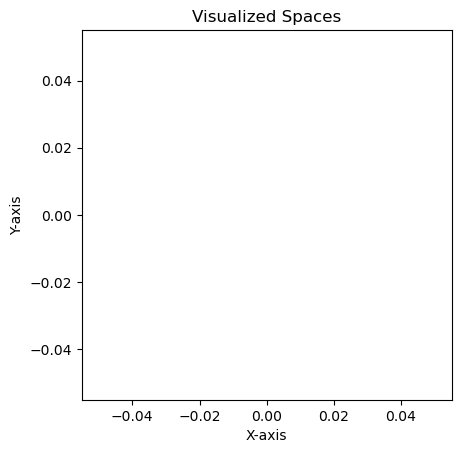

In [29]:
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt

# 更新的可视化函数，允许指定颜色
def visualize_space(merged_rectangles, ax, color='blue', hole_color='white'):
    # 如果是单个 Polygon，将其放入一个列表中
    if isinstance(merged_rectangles, Polygon):
        merged_rectangles = [merged_rectangles]
    # 如果是 MultiPolygon，提取每个 Polygon
    elif isinstance(merged_rectangles, MultiPolygon):
        merged_rectangles = [polygon for polygon in merged_rectangles.geoms]

    # 绘制并填充每个多边形
    for polygon in merged_rectangles:
        x, y = polygon.exterior.xy
        ax.fill(x, y, color=color, alpha=0.5)  

# 创建一个新的绘图
fig, ax = plt.subplots()

# 可视化三个区域
visualize_space(adjusted_inside_space, ax, color='green')   # 内部空间为绿色
visualize_space(adjusted_boundary_space, ax, color='blue')  # 边界空间为蓝色
visualize_space(adjusted_outside_space, ax, color='red')    # 外部空间为红色

# 设置图像的x和y边界
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Visualized Spaces')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


Q4 * 综合函数：

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box, MultiPolygon
from shapely.geometry import Polygon, MultiPolygon
from shapely.geometry import Point
from shapely.ops import unary_union

In [71]:
def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def init_sample_area(x_range,y_range):
    # 创建一个矩形多边形
    rectangle = box(x_range[0], y_range[0], x_range[1], y_range[1])

    # 将矩形多边形包装在一个 MultiPolygon 中
    multipolygon = MultiPolygon([rectangle])
    return multipolygon

def random_sampling_within_multipolygon(multipolygon, num_samples):
    """在给定的 MultiPolygon 范围内随机生成点"""
    minx, miny, maxx, maxy = multipolygon.bounds
    points = []
    print(multipolygon.bounds)
    while len(points) < num_samples:
        
        real = np.random.uniform(minx, maxx)
        imag = np.random.uniform(miny, maxy)
        point = Point(real, imag)  # 创建一个 Point 对象
        if multipolygon.contains(point):
            complex_point = real + imag * 1j  # 创建一个复数
            points.append(complex_point)
    return points

#定义采样结果
def random_sampling(multipolygon, num_samples, max_iter, iteration_threshold):
    points = random_sampling_within_multipolygon(multipolygon, num_samples)
    stabilities = [mandelbrot(c, max_iter) for c in points]
    inside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability == max_iter]
    boundary_points = [points[i] for i, stability in enumerate(stabilities) if iteration_threshold < stability < max_iter]
    outside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability <= iteration_threshold]
    return np.array(inside_mandelbrot), np.array(boundary_points), np.array(outside_mandelbrot)

#对于采样结果分成小正方形的集合
def define_regions(points, side_length):
    squares = []
    half_side = side_length / 2

    for point in points:
        left = max(point.real - half_side, x_range[0])
        right = min(point.real + half_side, x_range[1])
        bottom = max(point.imag - half_side, y_range[0])
        top = min(point.imag + half_side, y_range[1])

        # 仅当方形在定义的范围内时才添加
        if left < right and bottom < top:
            squares.append([left, right, bottom, top])

    return squares

#将小正方形的集合转为MultiPolygon格式
def merge_squares(squares, current_sample_space):
    polygons = [Polygon([(left, bottom), (right, bottom), (right, top), (left, top)]) for left, right, bottom, top in squares]
    merged_area = unary_union(polygons)

    # 使用intersection方法获取合并区域与current_sample_space的交集
    intersection = merged_area.intersection(current_sample_space)

    if isinstance(intersection, MultiPolygon):
        return intersection
    elif isinstance(intersection, Polygon):
        return MultiPolygon([intersection])
    else:
        return MultiPolygon([])  # 返回空的MultiPolygon对象
    
#处理生成的三个MultiPolygon区域
def adjust_spaces(inside_space, boundary_space, outside_space, init_space):
    # Step 1: Add intersection with boundary_space to boundary_space
    boundary_inside_intersection = boundary_space.intersection(inside_space)
    boundary_outside_intersection = boundary_space.intersection(outside_space)
    boundary_space = boundary_space.union(boundary_inside_intersection).union(boundary_outside_intersection)

    # Step 2: Remove intersection with boundary_space from inside_space and outside_space
    inside_space = inside_space.difference(boundary_inside_intersection)
    outside_space = outside_space.difference(boundary_outside_intersection)

    # Step 3: Add intersection between inside_space and outside_space to boundary_space
    inside_outside_intersection = inside_space.intersection(outside_space)
    boundary_space = boundary_space.union(inside_outside_intersection)

    # Remove intersections from inside_space and outside_space
    inside_space = inside_space.difference(inside_outside_intersection)
    outside_space = outside_space.difference(inside_outside_intersection)

    # Step 4: Calculate the difference between the union of all spaces and init_space
    union_of_spaces = inside_space.union(boundary_space).union(outside_space)
    difference = union_of_spaces.difference(init_space)

    # Step 5: Add the difference to boundary_space
    boundary_space = boundary_space.union(difference)
    
    return inside_space, boundary_space, outside_space

#进行每轮的可视化绘图
def visualize_space(merged_rectangles, ax, color='blue'):
    # 如果是单个 Polygon，将其放入一个列表中
    if isinstance(merged_rectangles, Polygon):
        merged_rectangles = [merged_rectangles]
    # 如果是 MultiPolygon，提取每个 Polygon
    elif isinstance(merged_rectangles, MultiPolygon):
        merged_rectangles = [polygon for polygon in merged_rectangles.geoms]

    # 绘制并填充每个多边形
    for polygon in merged_rectangles:
        x, y = polygon.exterior.xy
        ax.fill(x, y, color=color, alpha=0.5)  # 填充外部多边形


main

circle 1
(-2.0, -1.5, 1.0, 1.5)


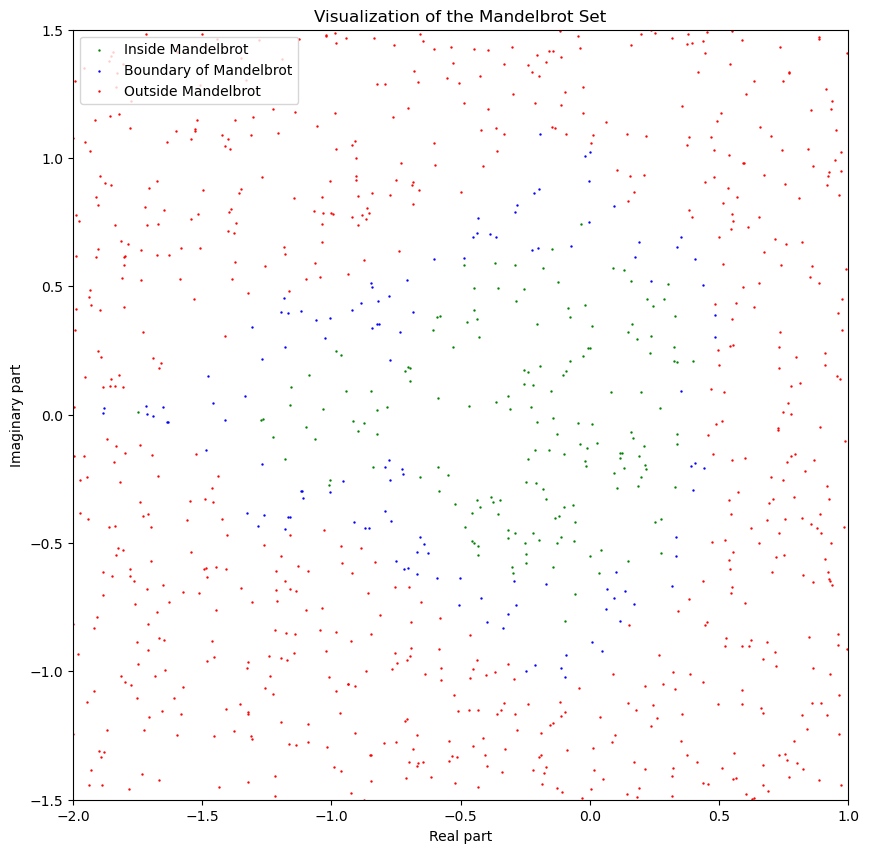

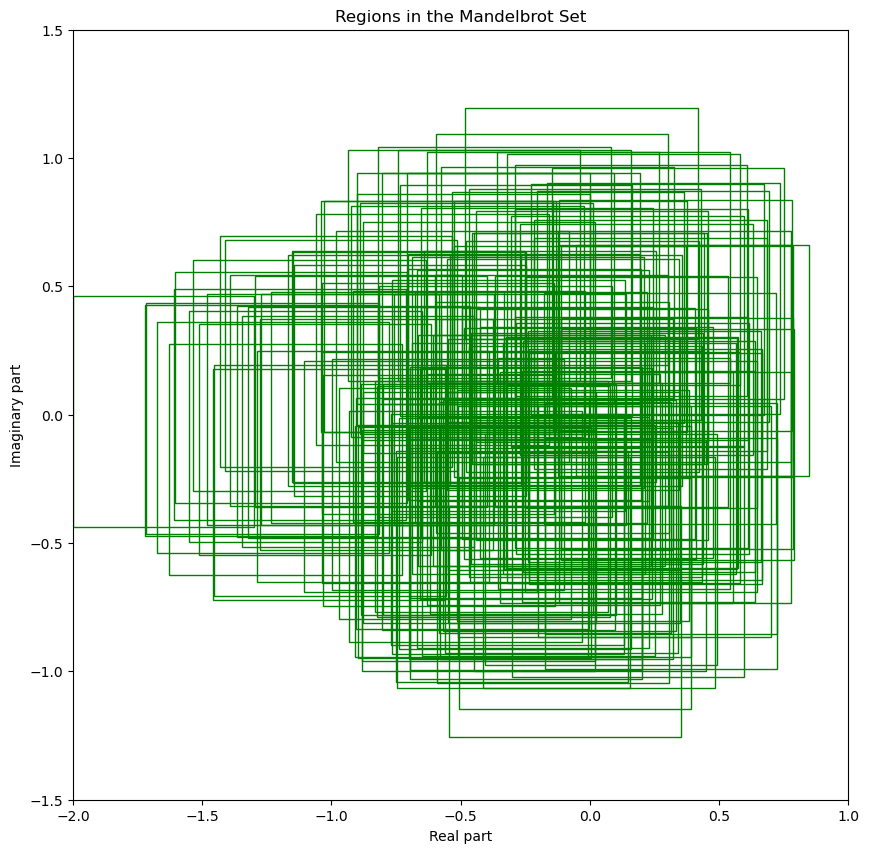

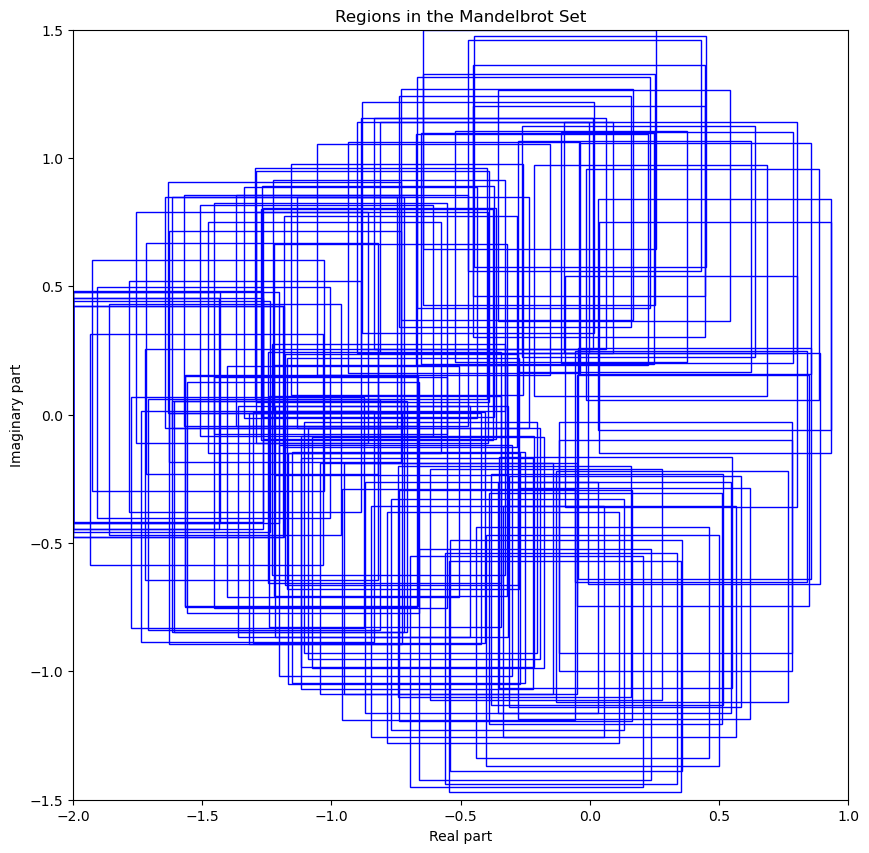

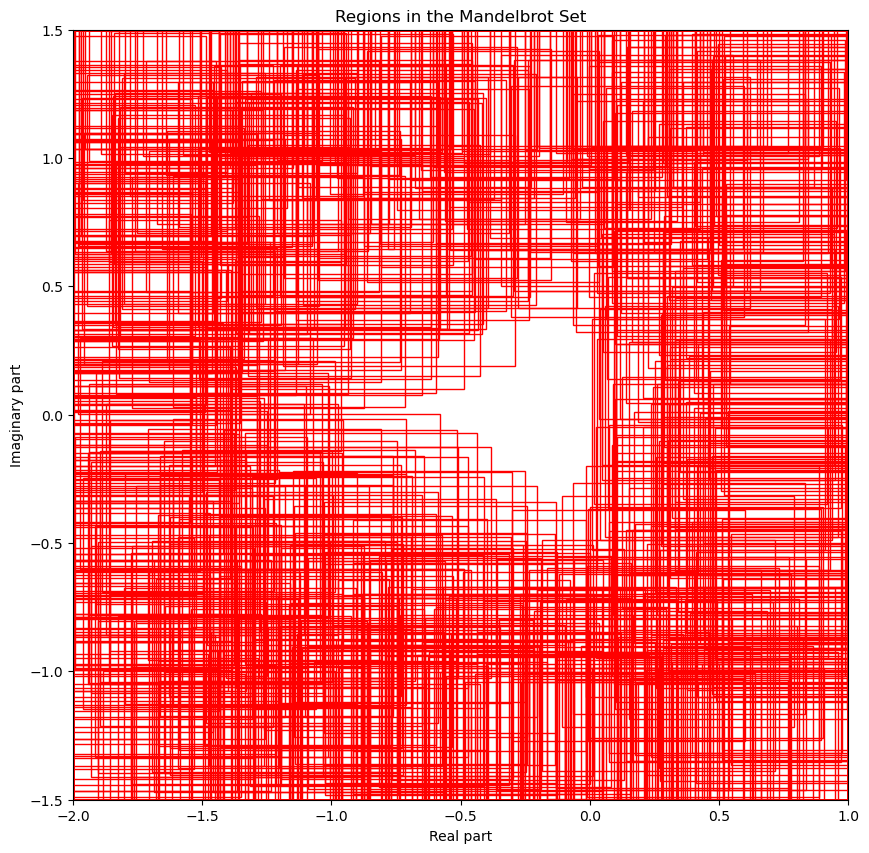

MULTIPOLYGON (((-1.6282776115036584 -0.5368695113338815, -1.6758486611578591 -0.5368695113338815, -1.6758486611578591 -0.4716358052863115, -1.7210821818200903 -0.4716358052863115, -1.7210821818200903 -0.4386409247379278, -2 -0.4386409247379278, -2 0.4613590752620723, -1.6099370687211236 0.4613590752620723, -1.6099370687211236 0.4882964265086816, -1.606802667681585 0.4882964265086816, -1.606802667681585 0.5574855536215477, -1.5346326921252784 0.5574855536215477, -1.5346326921252784 0.6044145584537113, -1.4312704510563787 0.6044145584537113, -1.4312704510563787 0.69774044515497, -1.057874652742077 0.69774044515497, -1.057874652742077 0.7812993947166453, -1.040598497362652 0.7812993947166453, -1.040598497362652 0.8319099627350295, -1.028994066856746 0.8319099627350295, -1.028994066856746 0.8338293530650256, -0.9358375851869296 0.8338293530650256, -0.9358375851869296 1.0323077451447744, -0.8177895448449988 1.0323077451447744, -0.8177895448449988 1.0427412743271647, -0.5953177175513773 1.04

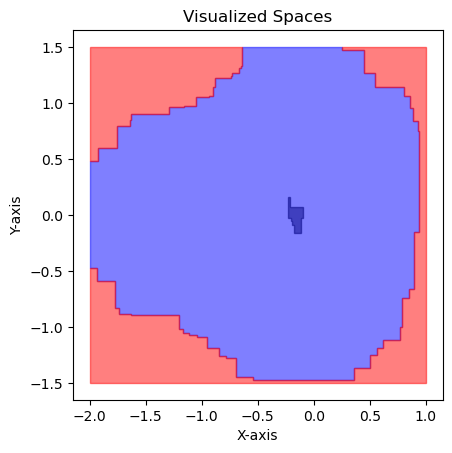

circle 2
(-2.0, -1.4716422485214333, 0.9349671636799195, 1.5)


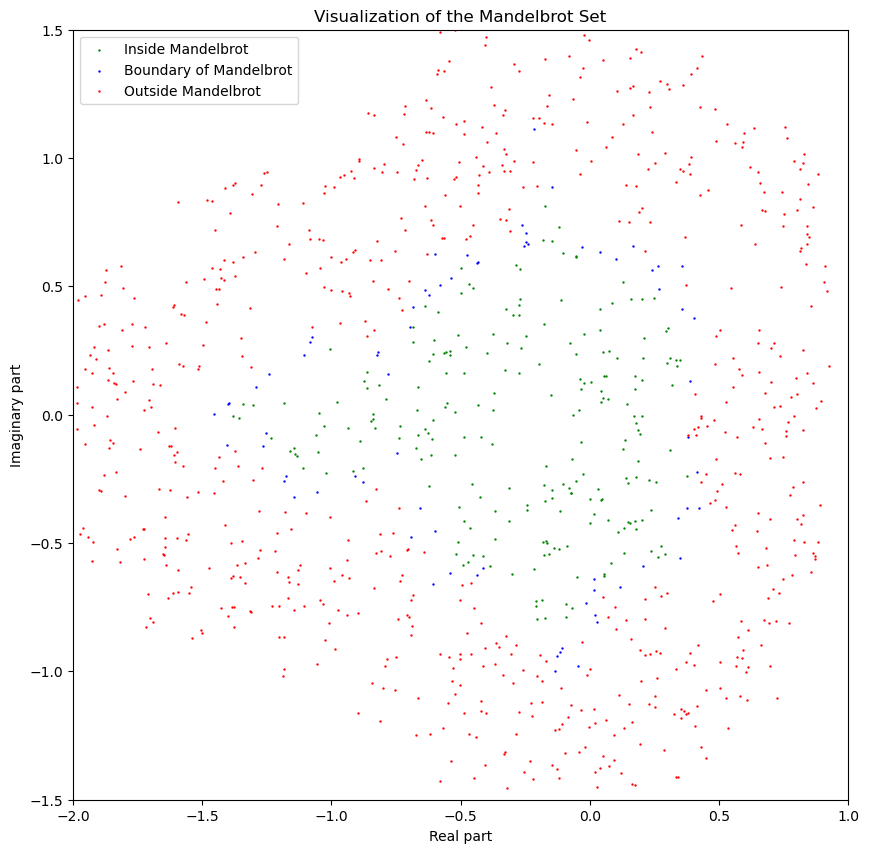

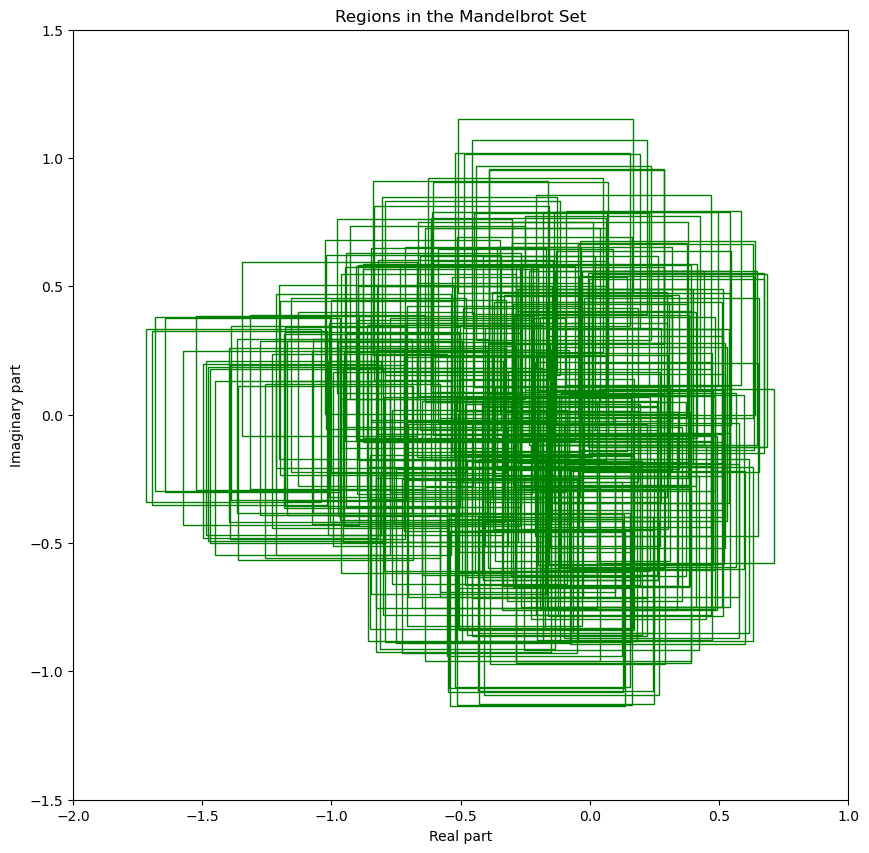

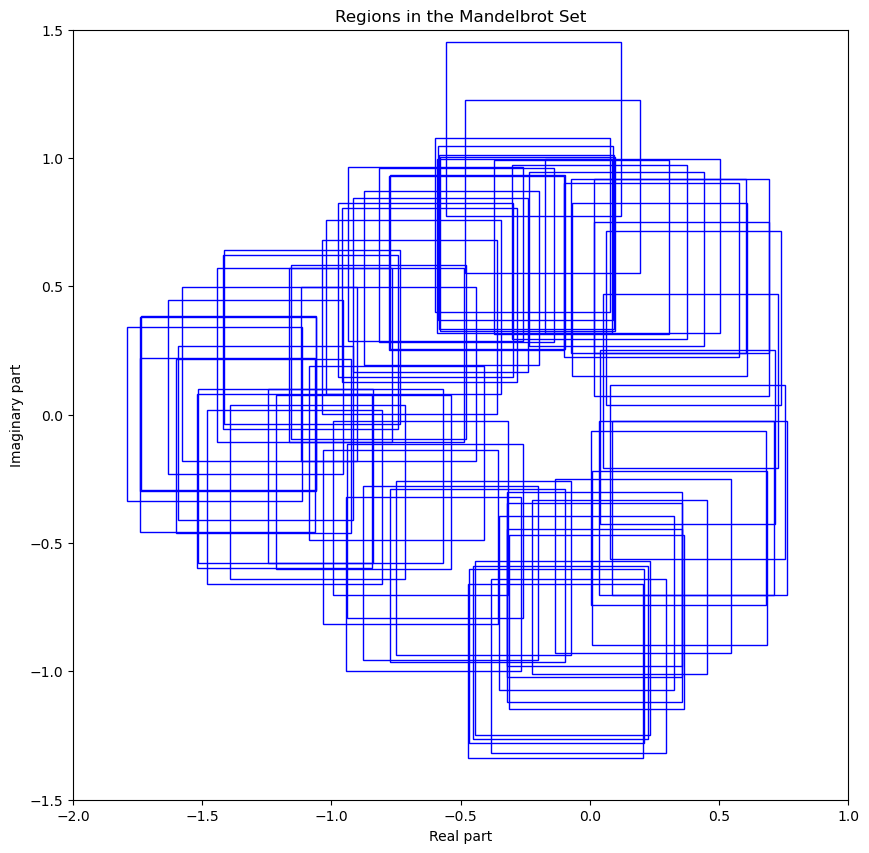

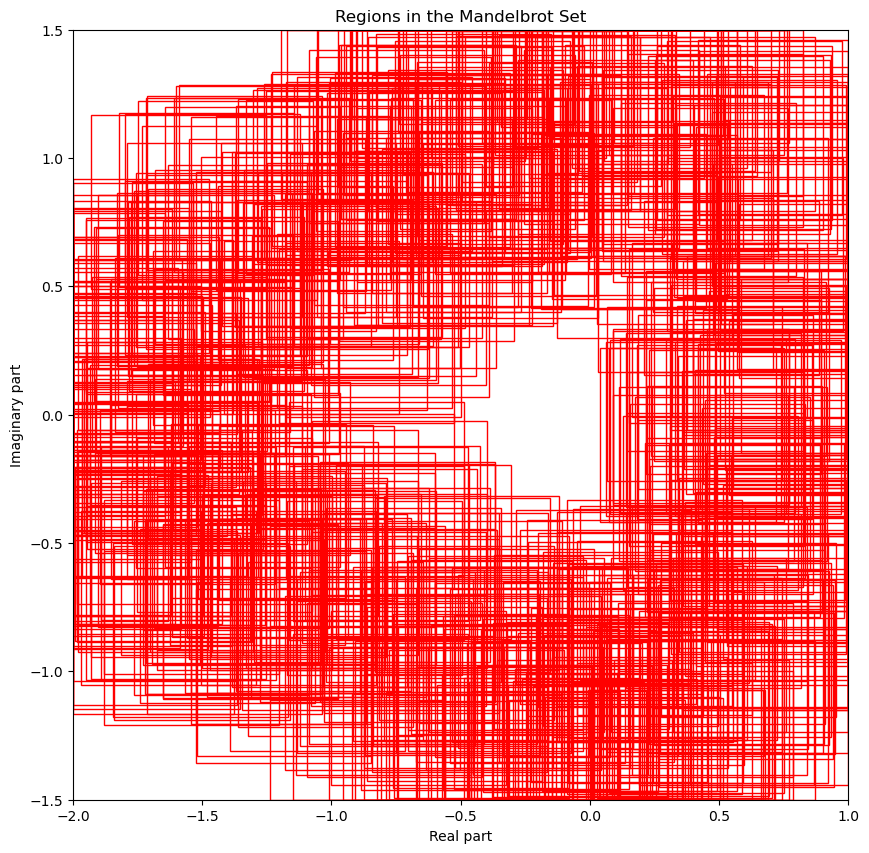

MULTIPOLYGON (((-1.450237451136155 -0.4988659436270123, -1.4705965698711188 -0.4988659436270123, -1.4705965698711188 -0.4923234355161495, -1.4782966076279438 -0.4923234355161495, -1.4782966076279438 -0.4812519725336845, -1.4981661875718024 -0.4812519725336845, -1.4981661875718024 -0.4283371899780298, -1.5725252945579613 -0.4283371899780298, -1.5725252945579613 -0.3532710602720216, -1.6945857560234776 -0.3532710602720216, -1.6945857560234776 -0.3419678696846563, -1.7190869803732656 -0.3419678696846563, -1.7190869803732656 0.3357370450110367, -1.6823641765754114 0.3357370450110367, -1.6823641765754114 0.381528033574224, -1.5228164726725715 0.381528033574224, -1.5228164726725715 0.384994908133799, -1.3448865779123227 0.384994908133799, -1.3448865779123227 0.5930825862309369, -1.0233390129196733 0.5930825862309369, -1.0233390129196733 0.6822768314944875, -0.9782660374476474 0.6822768314944875, -0.9782660374476474 0.7635551138618449, -0.838177892526286 0.7635551138618449, -0.838177892526286

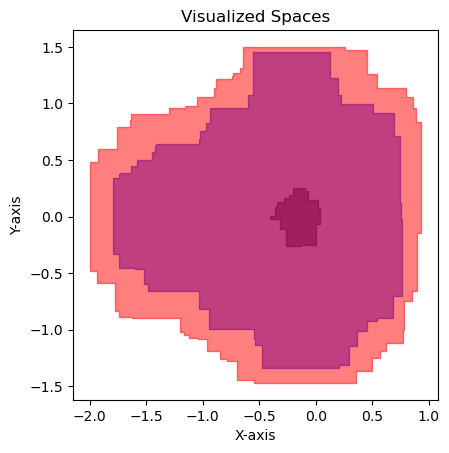

circle 3
(-1.7928005685083326, -1.3373150232218962, 0.7638591189581115, 1.4523022088620103)


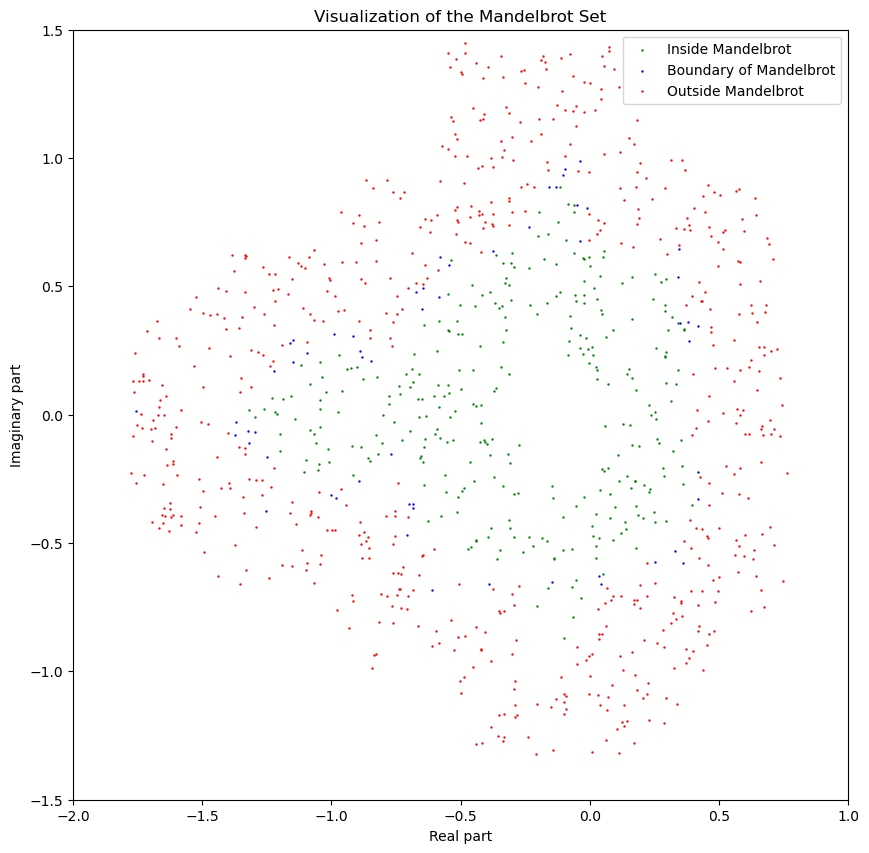

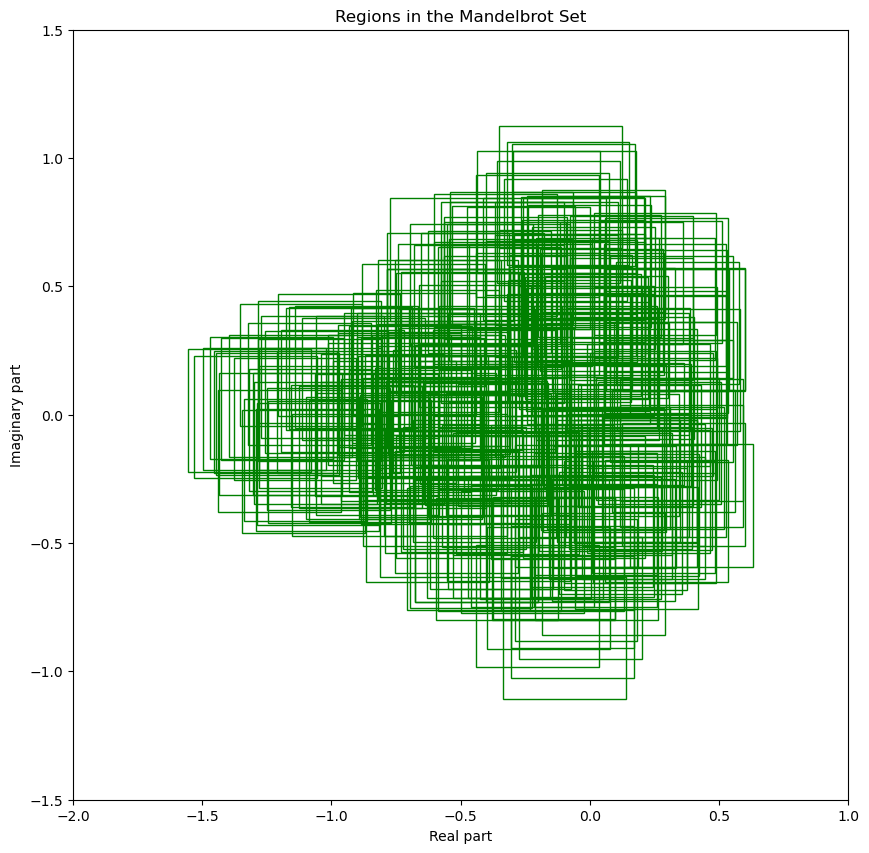

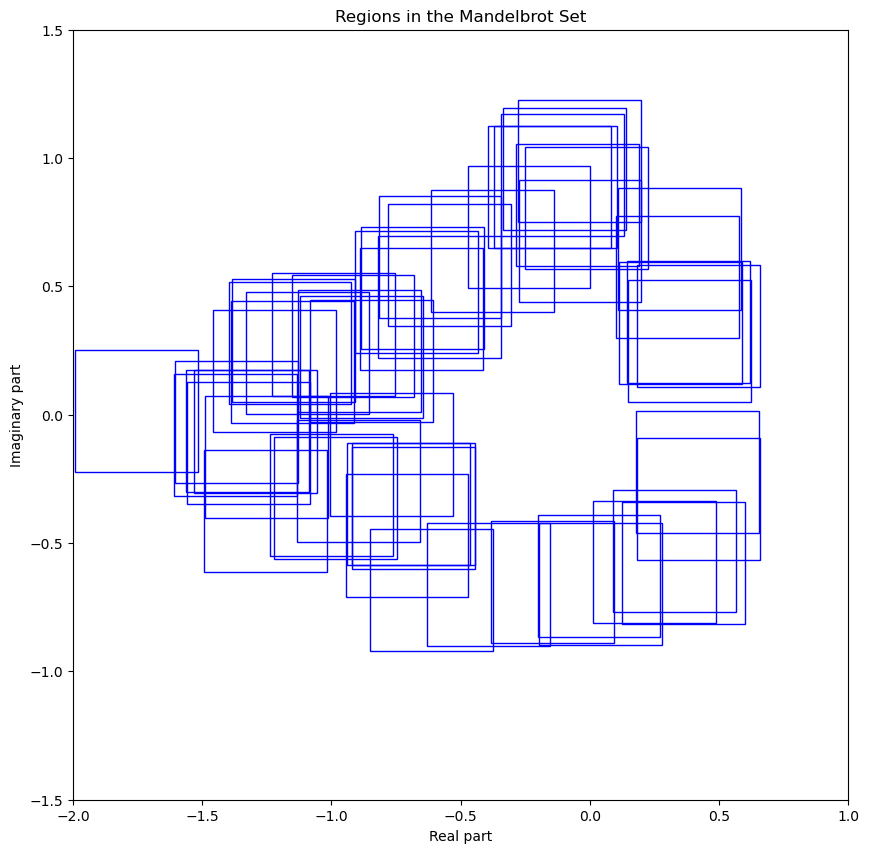

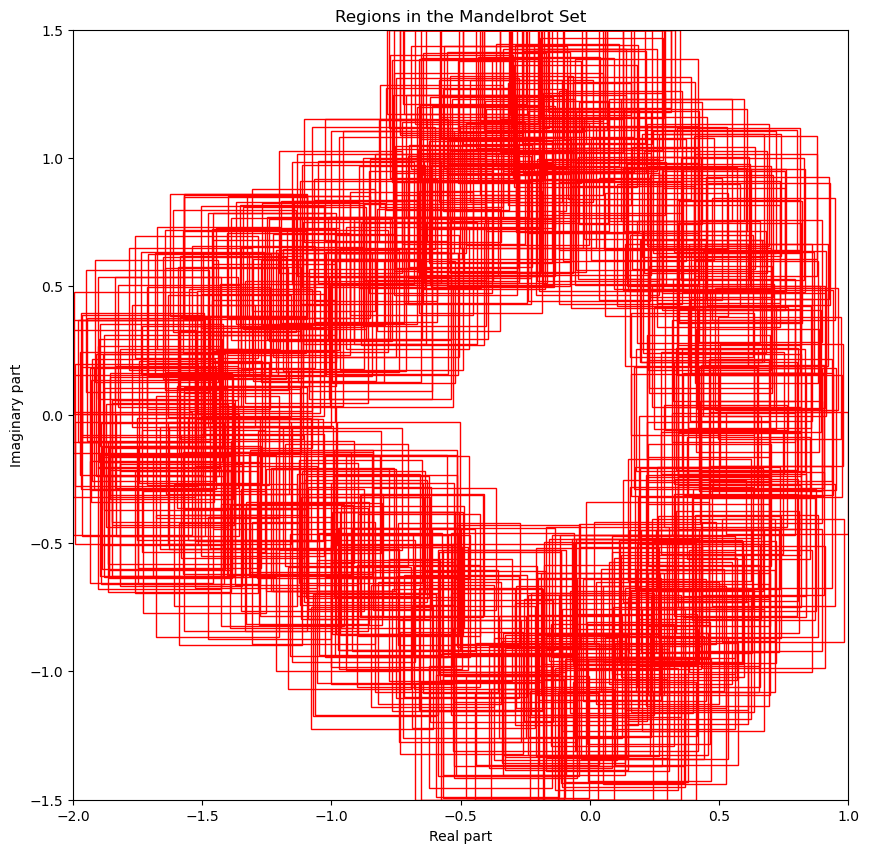

MULTIPOLYGON (((-1.533110380378209 -0.2453188224520366, -1.533110380378209 -0.2213208593345263, -1.55553200542198 -0.2213208593345263, -1.55553200542198 0.2543865604864323, -1.4976113987245372 0.2543865604864323, -1.4976113987245372 0.2613507817243954, -1.468570956314698 0.2613507817243954, -1.468570956314698 0.3031192393957942, -1.3954531389413536 0.3031192393957942, -1.3954531389413536 0.310849038177889, -1.3552348938491467 0.310849038177889, -1.3552348938491467 0.4318425090294384, -1.2824426581440693 0.4318425090294384, -1.2824426581440693 0.442616331086842, -1.2084026707594109 0.442616331086842, -1.2084026707594109 0.4699469013563388, -0.9161913715951007 0.4699469013563388, -0.9161913715951007 0.4758562992993271, -0.8799503234383301 0.4758562992993271, -0.8799503234383301 0.5863286569899648, -0.8199391982904742 0.5863286569899648, -0.8199391982904742 0.6014789667100744, -0.7862059678925093 0.6014789667100744, -0.7862059678925093 0.7082393523340758, -0.7734841291969432 0.70823935233

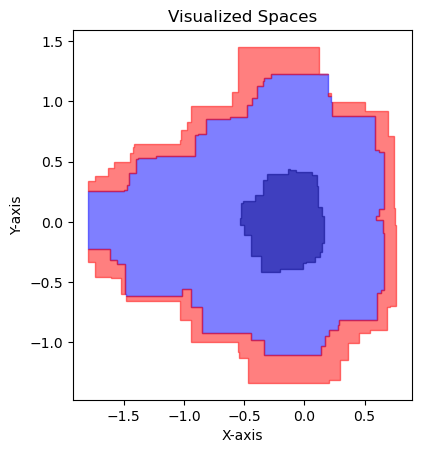

circle 4
(-1.7928005685083326, -1.1088348649163846, 0.6578238012970925, 1.2264286879816304)


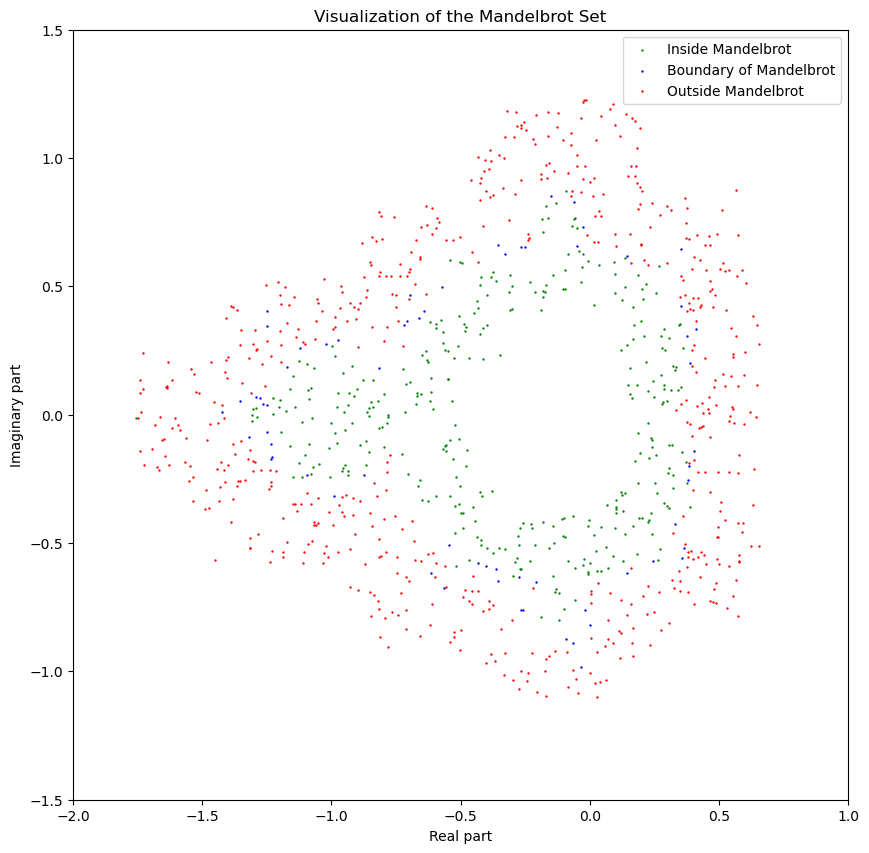

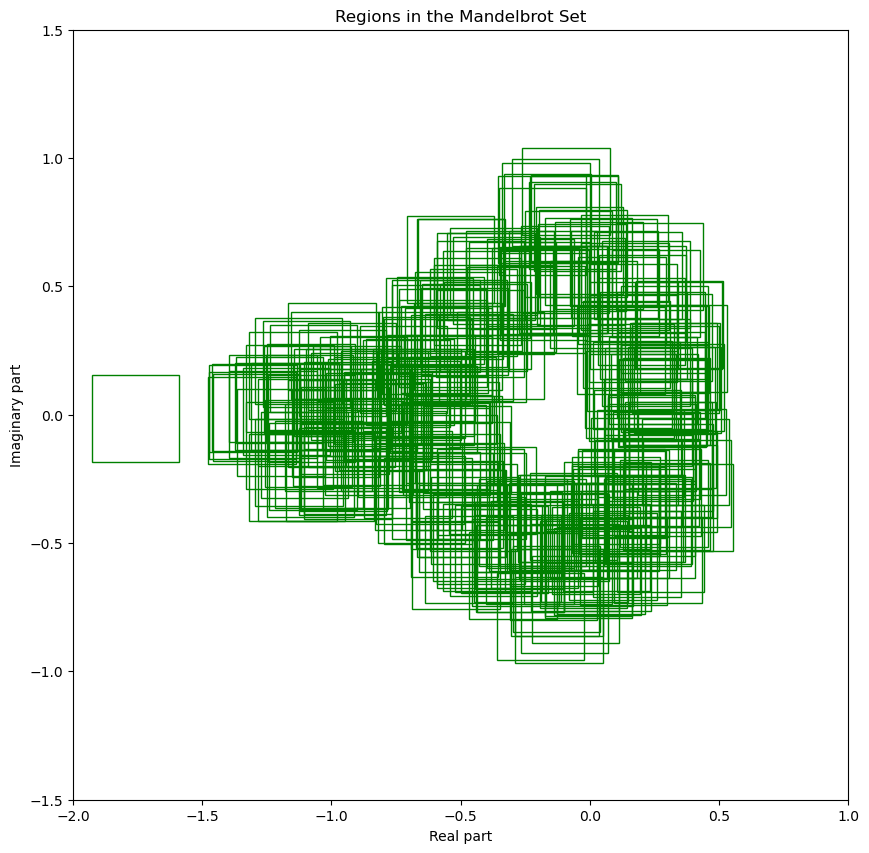

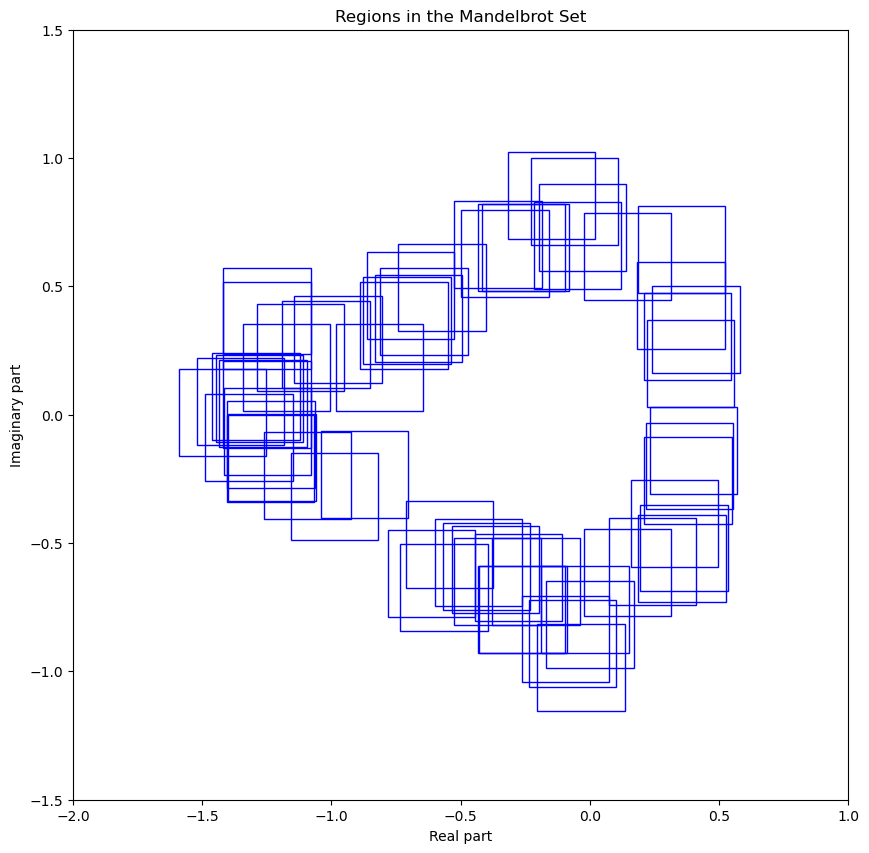

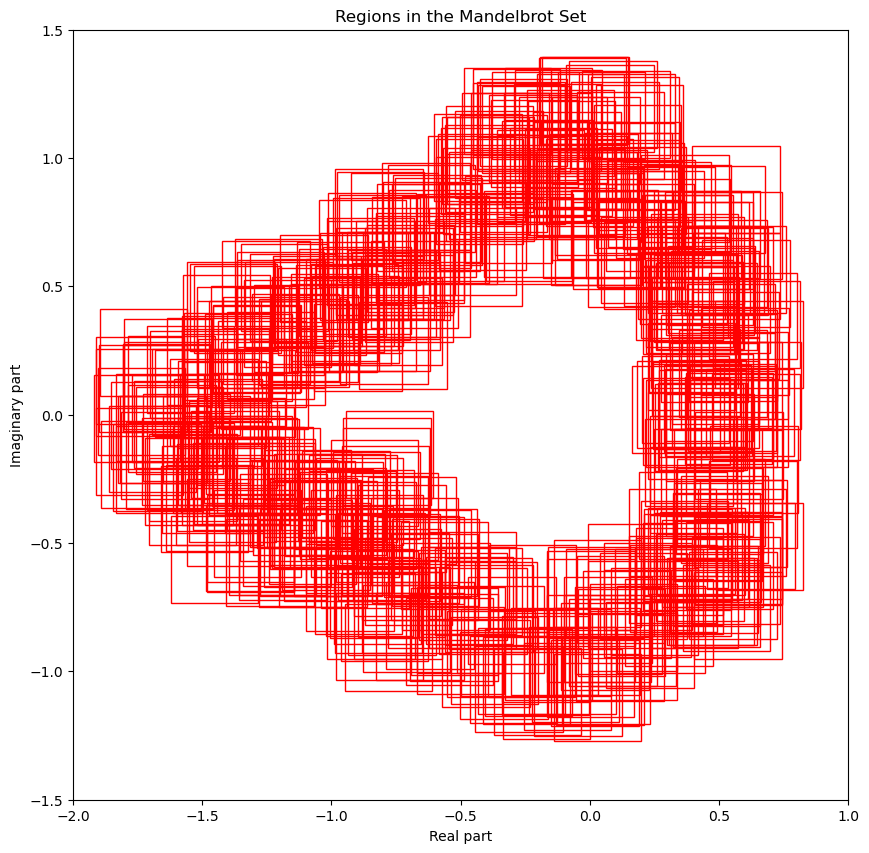

MULTIPOLYGON (((-1.317414328836188 -0.4126757019594511, -1.317414328836188 -0.2907140440789016, -1.3307689023172216 -0.2907140440789016, -1.3307689023172216 -0.2377385503117943, -1.3637418466826239 -0.2377385503117943, -1.3637418466826239 -0.1933433409838265, -1.4759214520698063 -0.1933433409838265, -1.4759214520698063 0.1451888187604226, -1.4755385945948223 0.1451888187604226, -1.4755385945948223 0.1671218436938503, -1.4728157048888513 0.1671218436938503, -1.4728157048888513 0.192050916896308, -1.4608118060300763 0.192050916896308, -1.4608118060300763 0.1961991846996422, -1.3943175920765718 0.1961991846996422, -1.3943175920765718 0.2326967504859911, -1.3291305199325725 0.2326967504859911, -1.3291305199325725 0.2698174225502686, -1.3185574831071756 0.2698174225502686, -1.3185574831071756 0.3211382592377462, -1.296336896129089 0.3211382592377462, -1.296336896129089 0.378656016462842, -1.1659650483862807 0.378656016462842, -1.1659650483862807 0.4364024398588308, -0.8274328886420316 0.436

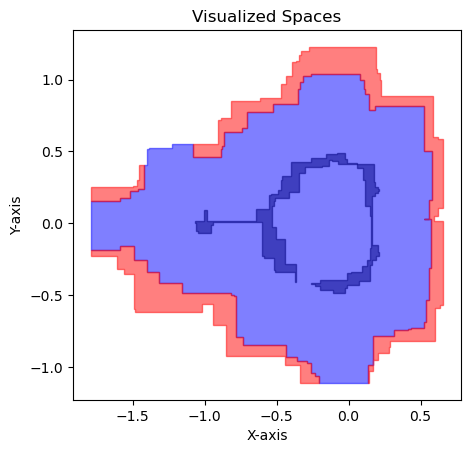

circle 5
(-1.7928005685083326, -1.1088348649163846, 0.5802391075443111, 1.0390963676154994)


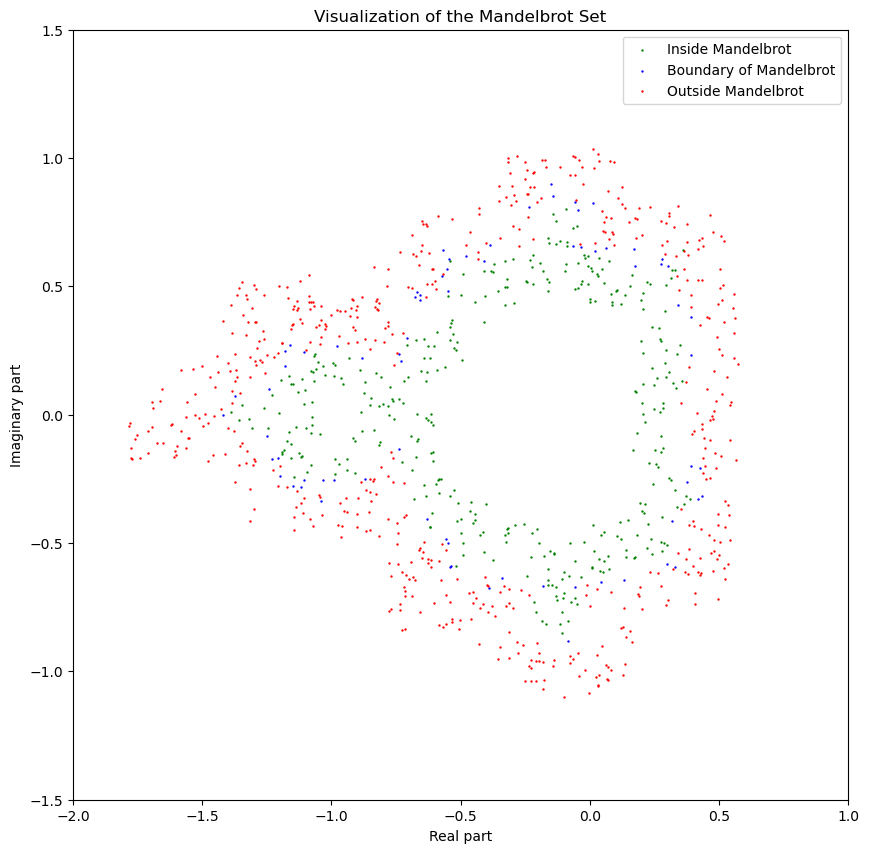

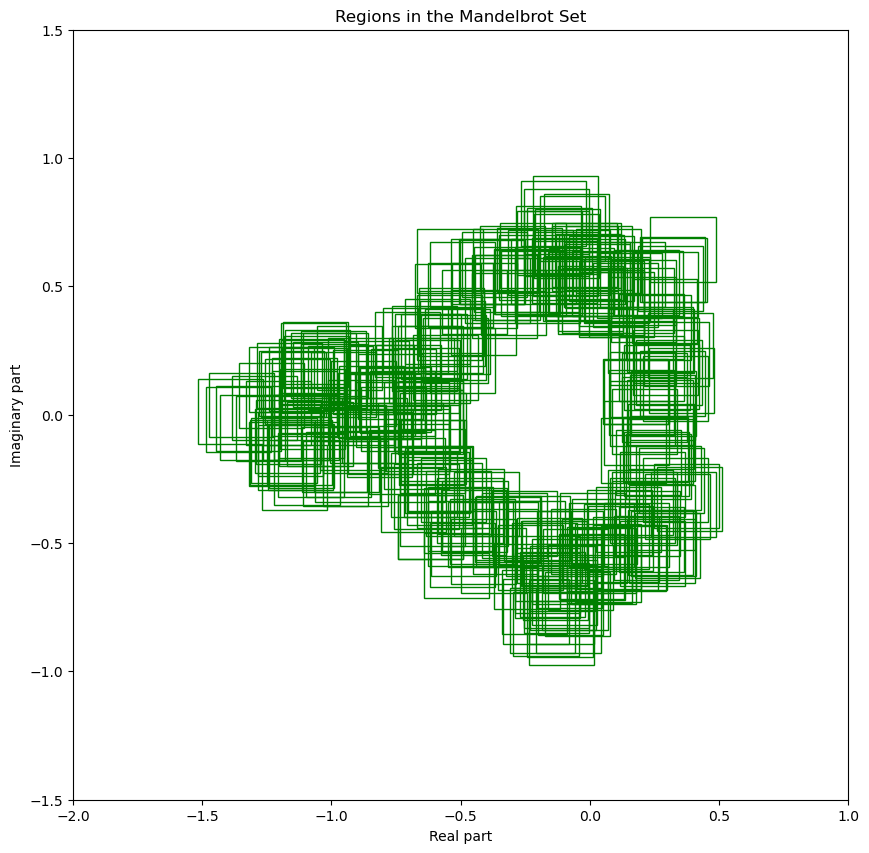

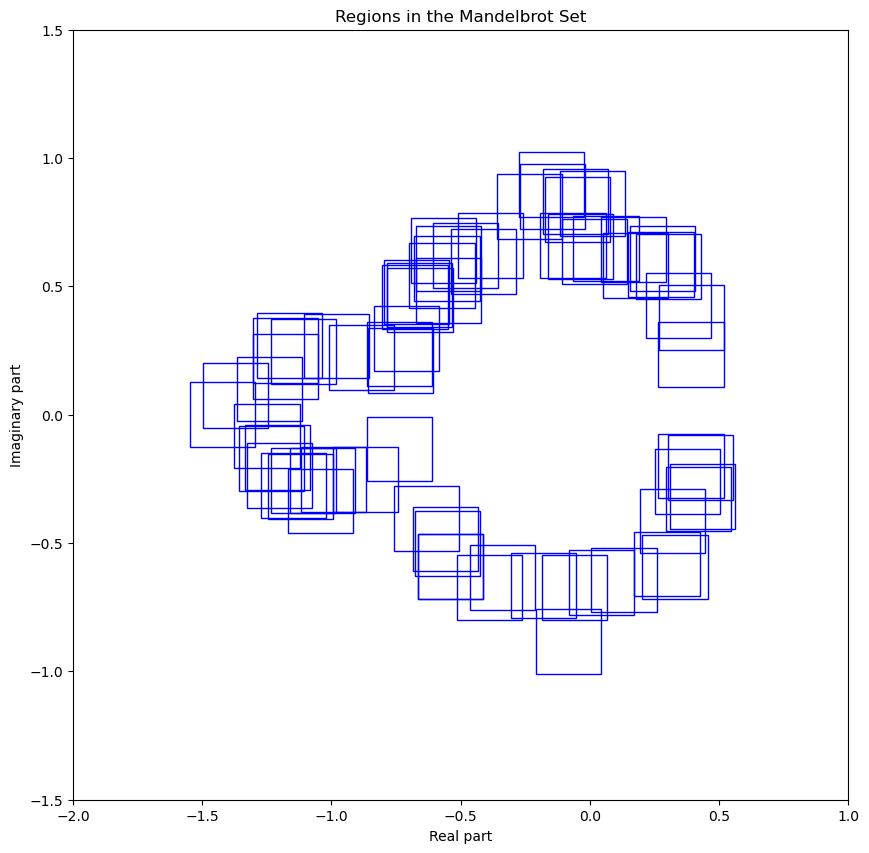

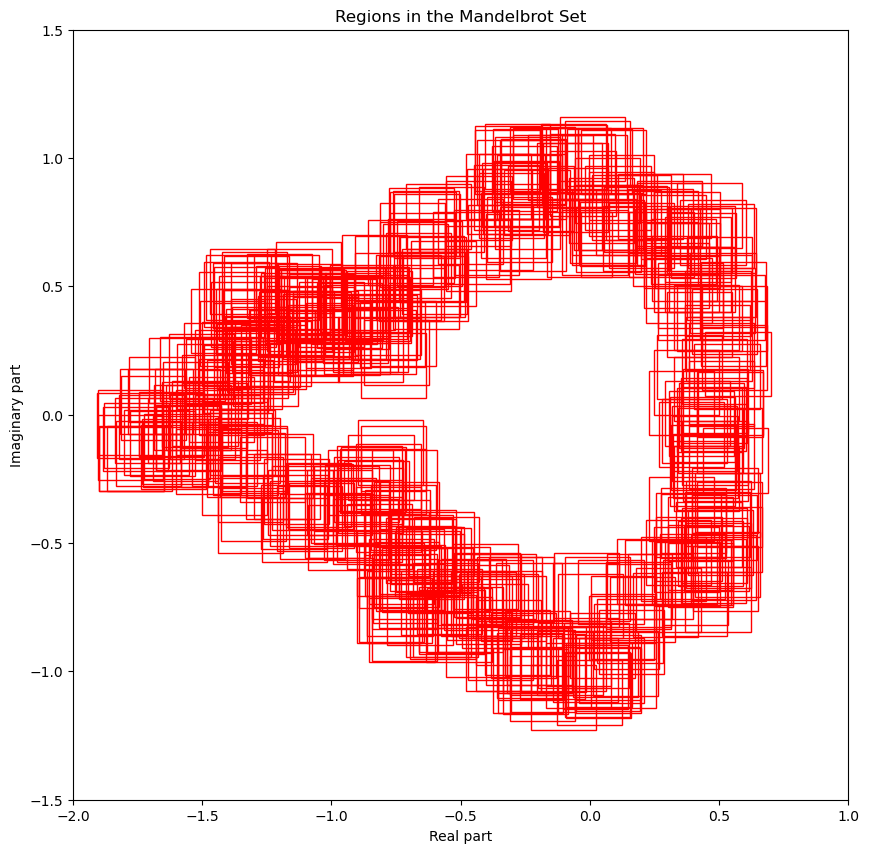

MULTIPOLYGON (((-1.3710693131031886 -0.1764320233599358, -1.4316950095946612 -0.1764320233599358, -1.4316950095946612 -0.1448393657961926, -1.4846622293240779 -0.1448393657961926, -1.4846622293240779 -0.1148840884028834, -1.5155133960644684 -0.1148840884028834, -1.5155133960644684 0.1373670181053492, -1.4736730747743205 0.1373670181053492, -1.4736730747743205 0.1635447682994382, -1.3578205003434696 0.1635447682994382, -1.3578205003434696 0.2012940131560352, -1.3201208025504159 0.2012940131560352, -1.3201208025504159 0.2628837259295637, -1.2893383866248538 0.2628837259295637, -1.2893383866248538 0.278453639226708, -1.2040596535155286 0.278453639226708, -1.2040596535155286 0.2949023403832793, -1.1938417707557805 0.2949023403832793, -1.1938417707557805 0.3562600755722151, -1.1876874580239845 0.3562600755722151, -1.1876874580239845 0.3608417532028753, -0.9354363515157518 0.3608417532028753, -0.9354363515157518 0.346850888314996, -0.8319210849713141 0.346850888314996, -0.8319210849713141 0.

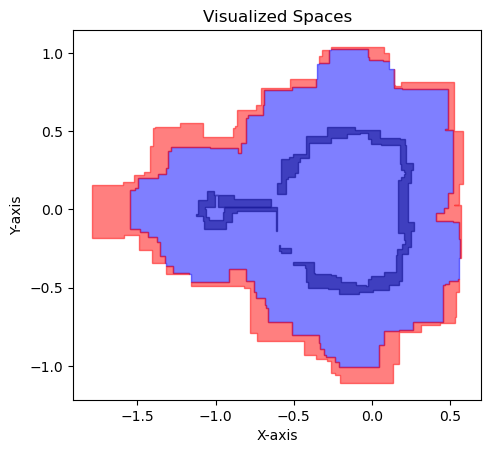

circle 6
(-1.547101600423106, -1.0085409034301758, 0.5613257192048602, 1.0236236279806046)


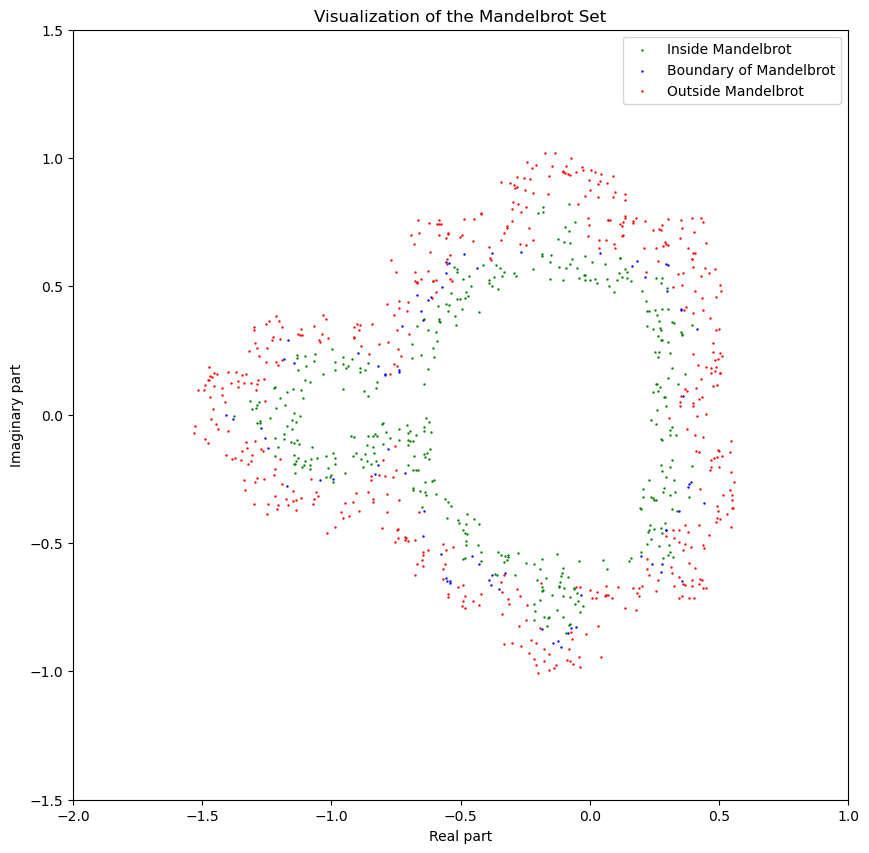

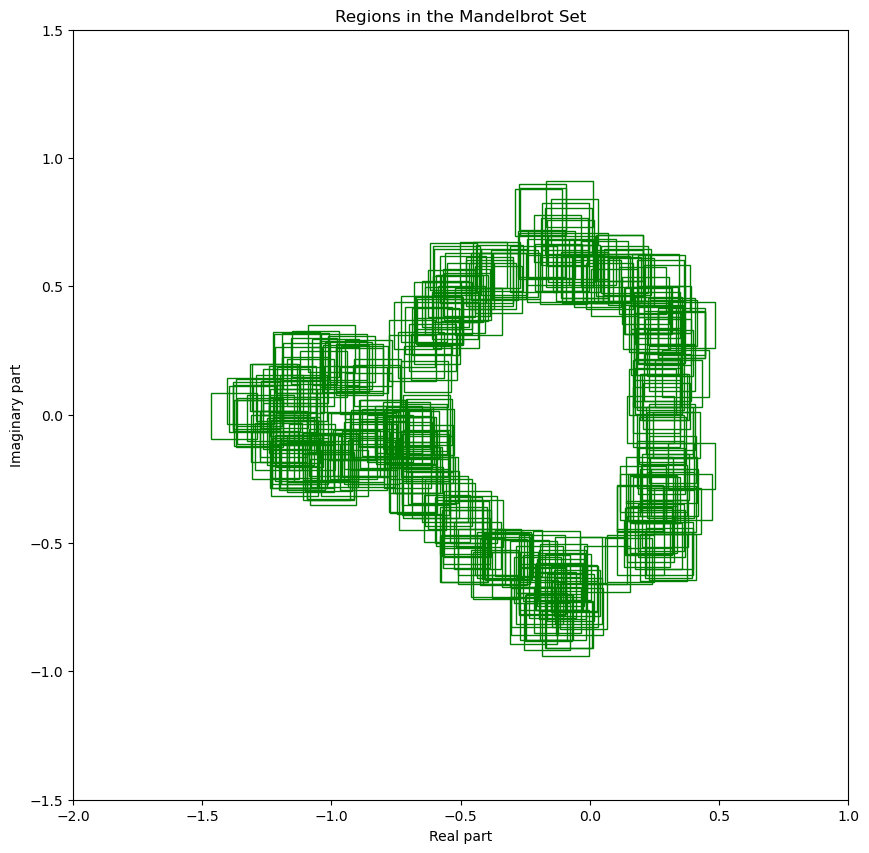

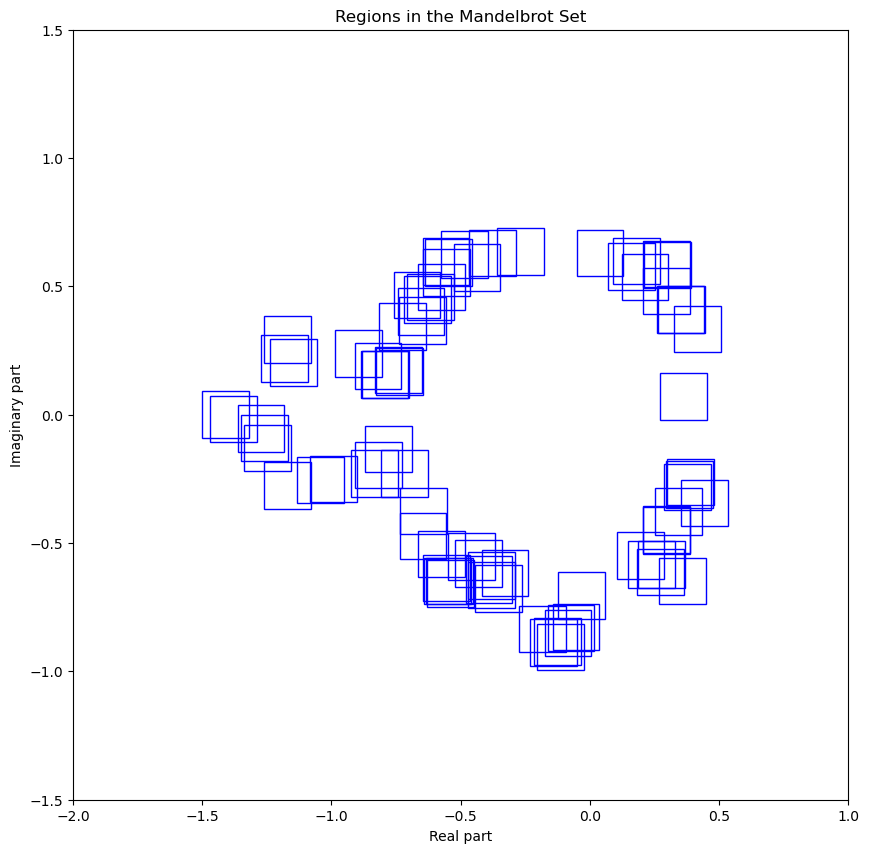

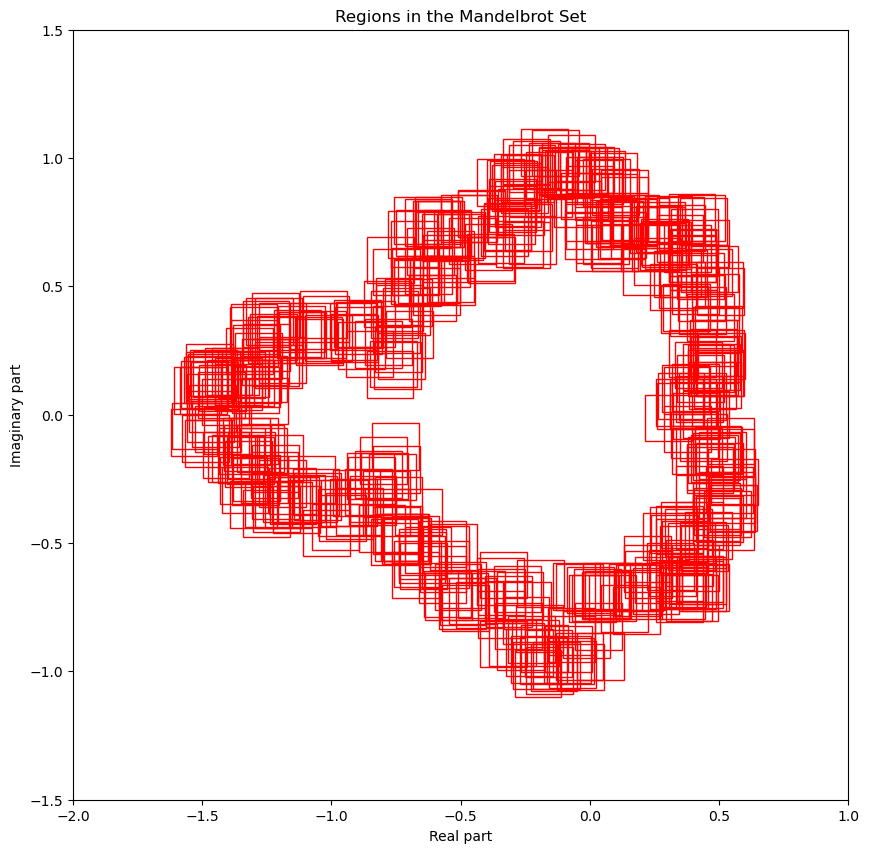

MULTIPOLYGON (((-1.3099416135698672 -0.124008234850517, -1.3685834492302686 -0.124008234850517, -1.3685834492302686 -0.1233582525657008, -1.3788123727646164 -0.1233582525657008, -1.3788123727646164 -0.0960968119871934, -1.46734783410651 -0.0960968119871934, -1.46734783410651 0.085091190738962, -1.4037978384773762 0.085091190738962, -1.4037978384773762 0.1448196599442082, -1.3141733190661158 0.1448196599442082, -1.3141733190661158 0.1960140447430267, -1.307693201126942 0.1960140447430267, -1.307693201126942 0.1976114761927321, -1.2246913370396662 0.1976114761927321, -1.2246913370396662 0.324207084001507, -1.1521600352730312 0.324207084001507, -1.1521600352730312 0.3267913421321198, -1.0890008718869892 0.3267913421321198, -1.0890008718869892 0.3477994383207763, -0.9078128691608339 0.3477994383207763, -0.9078128691608339 0.3162275065286346, -0.8625244177206305 0.3162275065286346, -0.8625244177206305 0.3070365444286922, -0.8301900728319647 0.3070365444286922, -0.8301900728319647 0.29204961

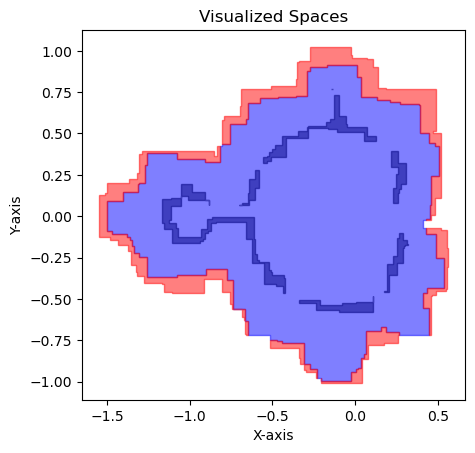

circle 7
(-1.4989268342782018, -0.994953304365987, 0.53456815189062, 0.9116243593485698)


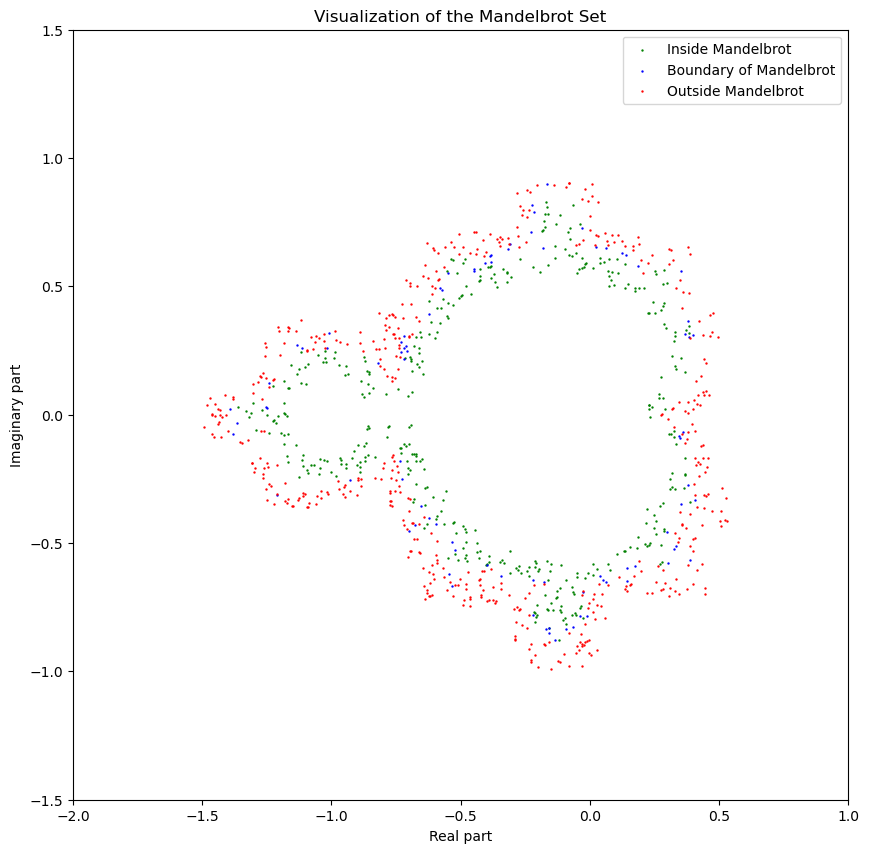

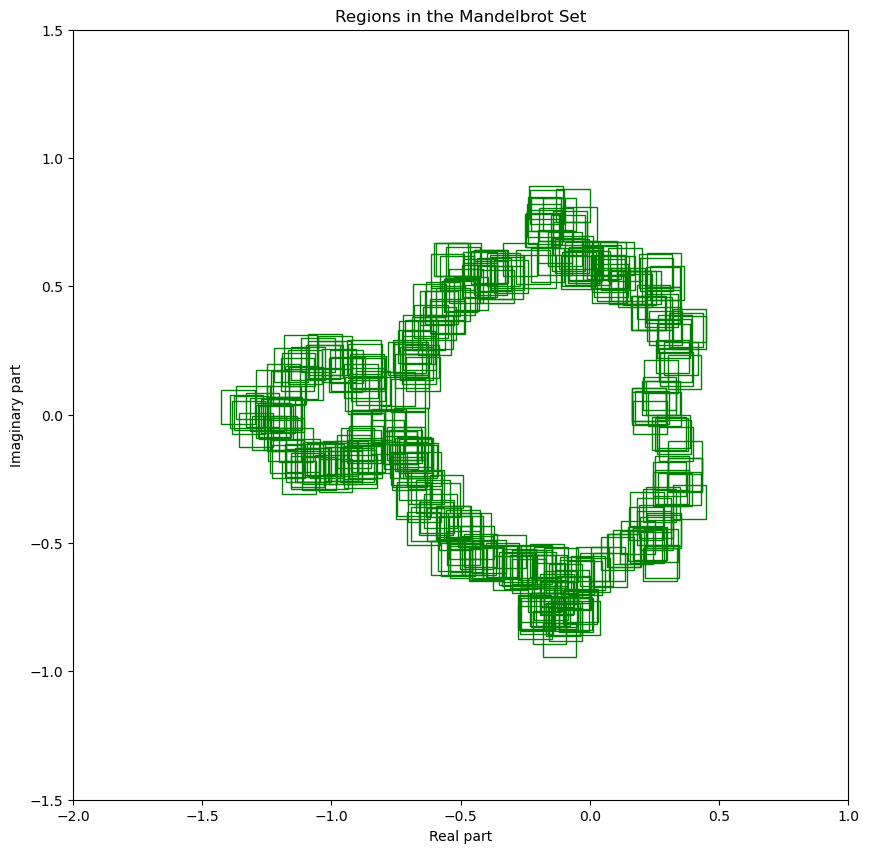

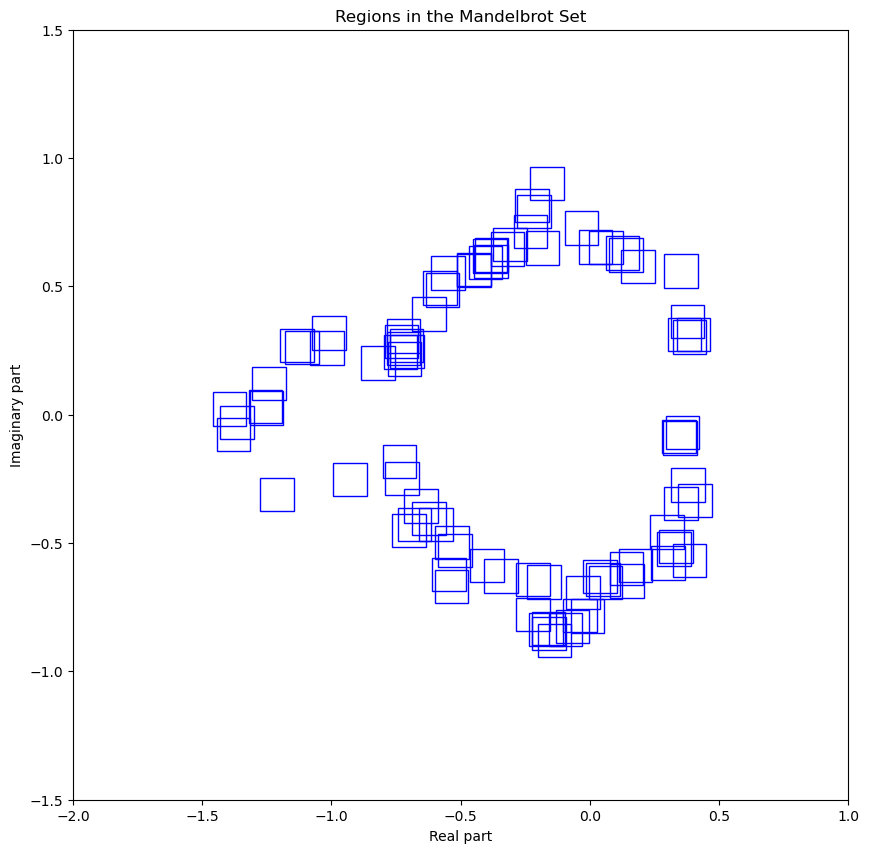

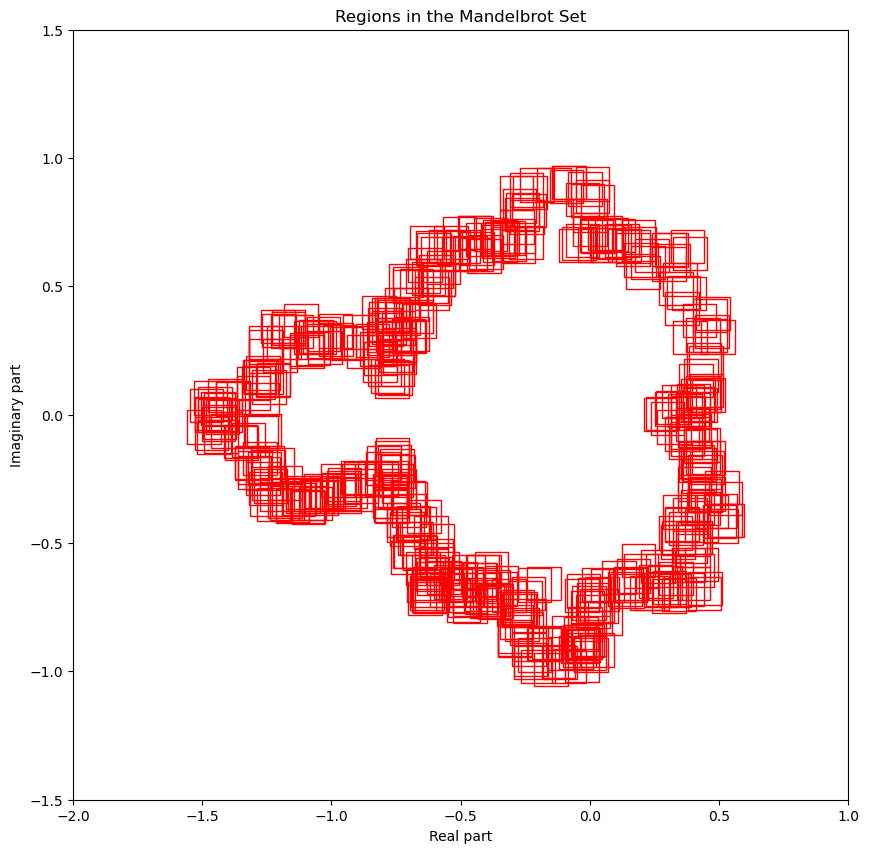

MULTIPOLYGON (((-1.2466612983165877 -0.1423134707369007, -1.2479317756654182 -0.1423134707369007, -1.2479317756654182 -0.1365568253215746, -1.307046811845362 -0.1365568253215746, -1.307046811845362 -0.124170967807815, -1.3576702324515069 -0.124170967807815, -1.3576702324515069 -0.0757089811612238, -1.385315011210638 -0.0757089811612238, -1.385315011210638 -0.0519858054895419, -1.3935795005063705 -0.0519858054895419, -1.3935795005063705 -0.0354843289486764, -1.4252891678118254 -0.0354843289486764, -1.4252891678118254 0.090956874554758, -1.4037978384773762 0.090956874554758, -1.4037978384773762 0.0946167921896848, -1.3695352653574517 0.0946167921896848, -1.3695352653574517 0.1117216593357617, -1.2921625106053012 0.1117216593357617, -1.2921625106053012 0.1758827674720351, -1.2499069030911112 0.1758827674720351, -1.2499069030911112 0.1962106923575919, -1.2223217398078516 0.1962106923575919, -1.2223217398078516 0.2586007447533398, -1.1842892287629052 0.2586007447533398, -1.1842892287629052 

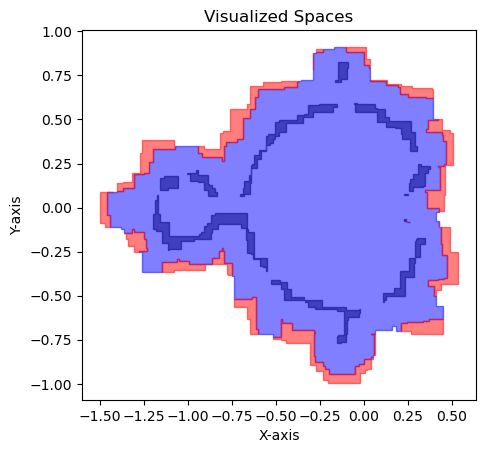

circle 8
(-1.4588267432085715, -0.9438359330882506, 0.4719015423115759, 0.9116243593485698)


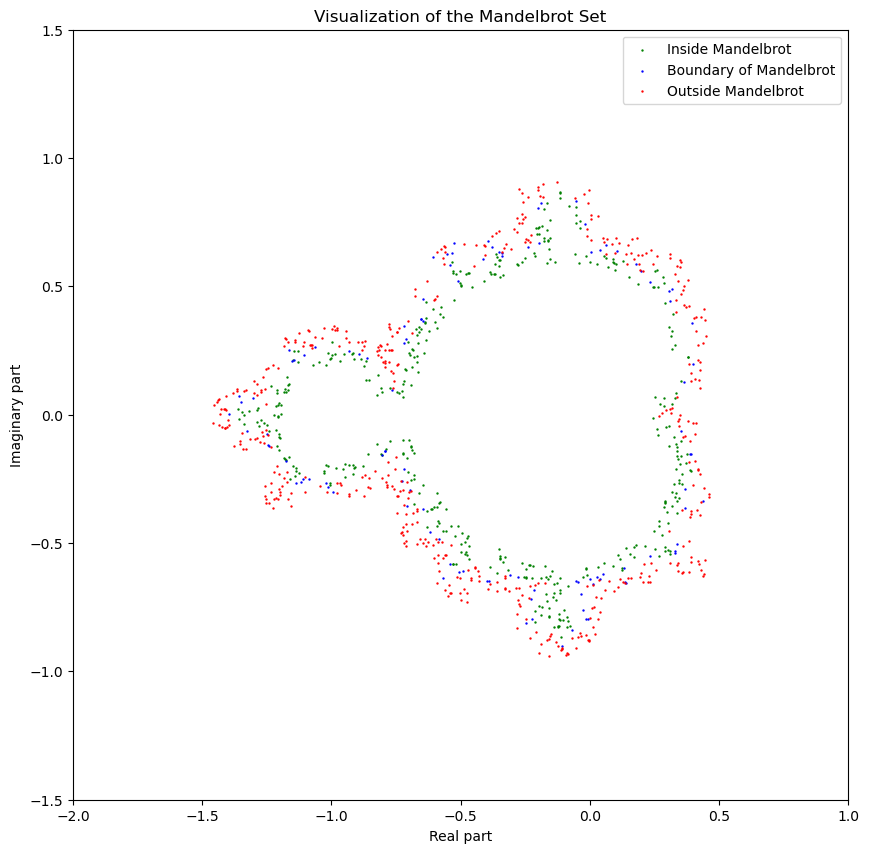

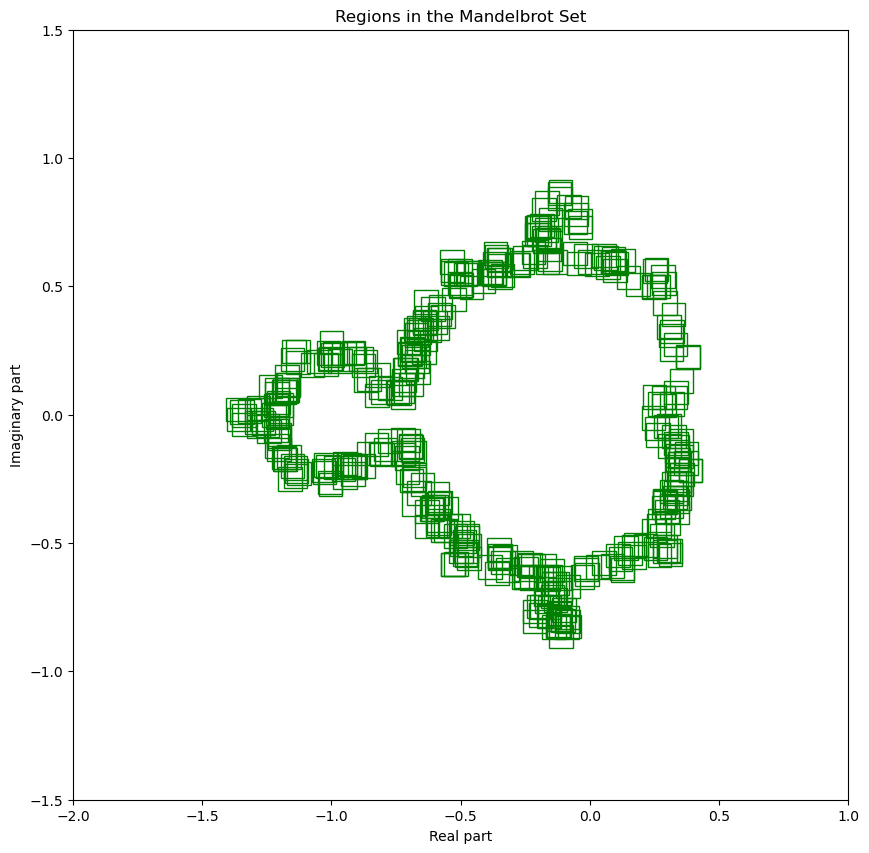

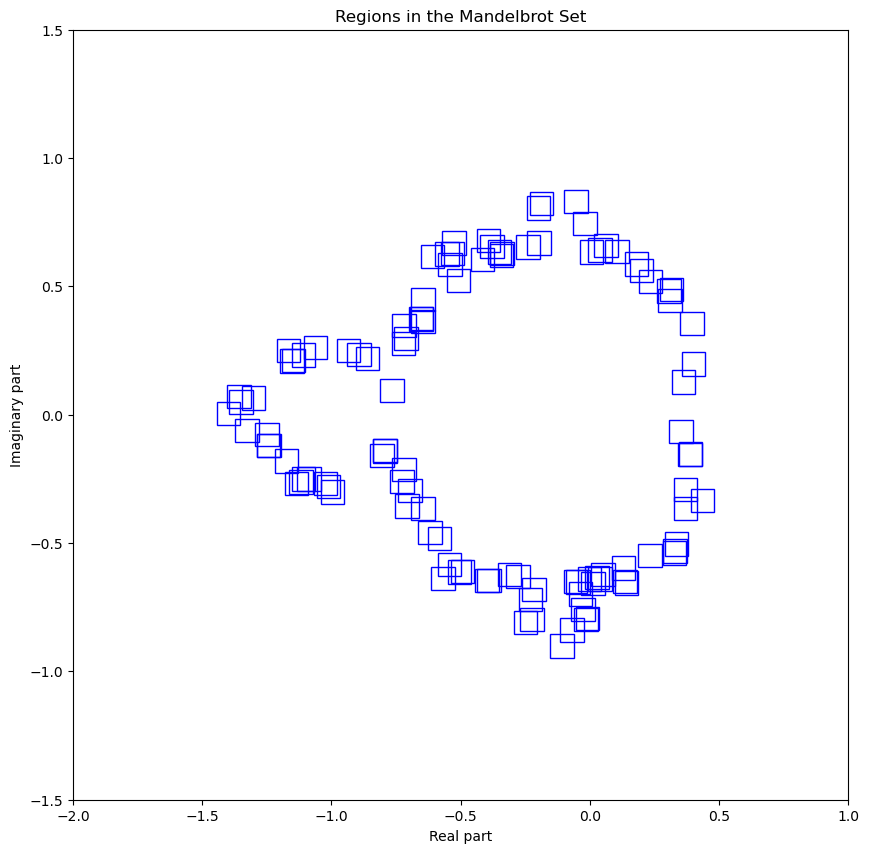

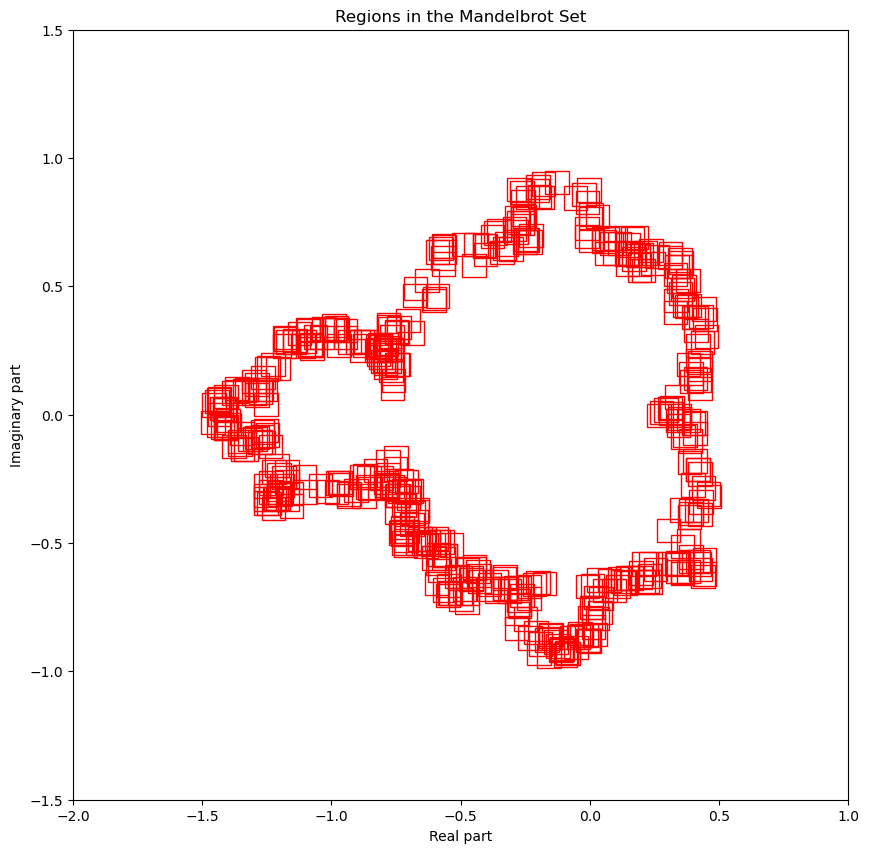

MULTIPOLYGON (((-1.2288799399988637 -0.1817224264180546, -1.2375857772556593 -0.1817224264180546, -1.2375857772556593 -0.1807044668059397, -1.2466612983165877 -0.1807044668059397, -1.2466612983165877 -0.1423134707369007, -1.2479317756654182 -0.1423134707369007, -1.2479317756654182 -0.1365568253215746, -1.2561761216018366 -0.1365568253215746, -1.2561761216018366 -0.1099536483115, -1.2860896115352374 -0.1099536483115, -1.2860896115352374 -0.0903859586515662, -1.3275210795164896 -0.0903859586515662, -1.3275210795164896 -0.0834990749508789, -1.3834350333144743 -0.0834990749508789, -1.3834350333144743 -0.0637503491528736, -1.4029239703646548 -0.0637503491528736, -1.4029239703646548 -0.0240347972677595, -1.407687005541283 -0.0240347972677595, -1.407687005541283 0.067060229647318, -1.3277693847357404 0.067060229647318, -1.3277693847357404 0.0718060325425731, -1.2808706159756718 0.0718060325425731, -1.2808706159756718 0.1557341773858623, -1.2164384046941232 0.1557341773858623, -1.2164384046941

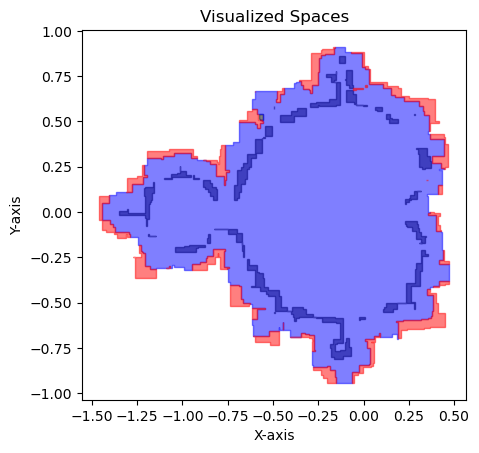

circle 9
(-1.4431676467393448, -0.9438359330882506, 0.4719015423115759, 0.9116243593485698)


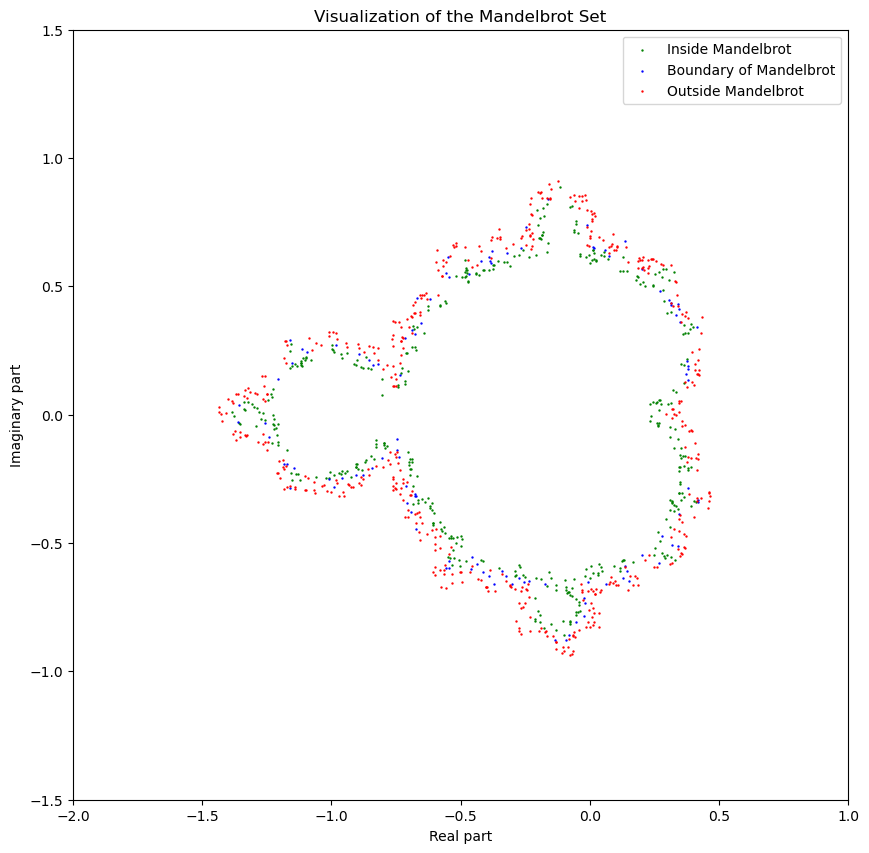

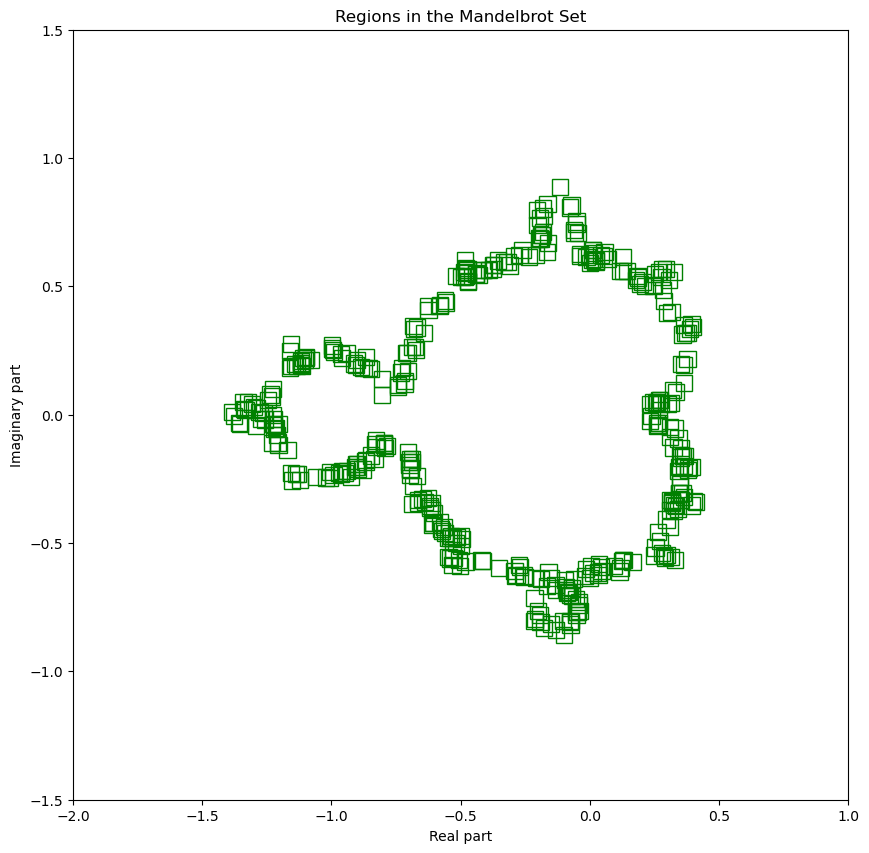

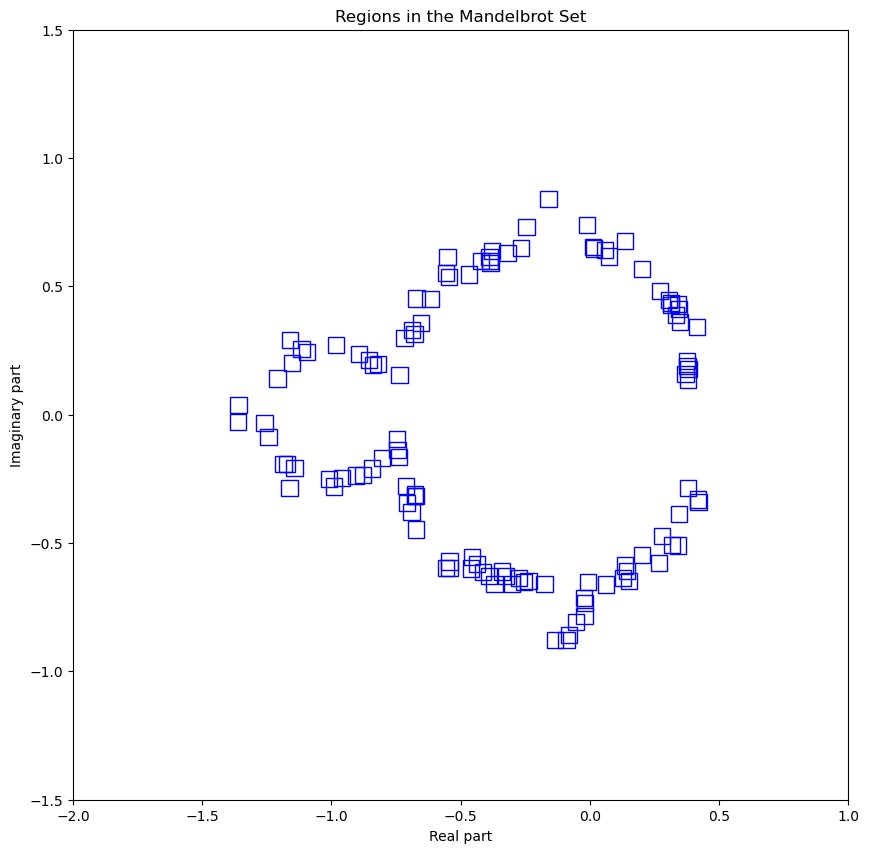

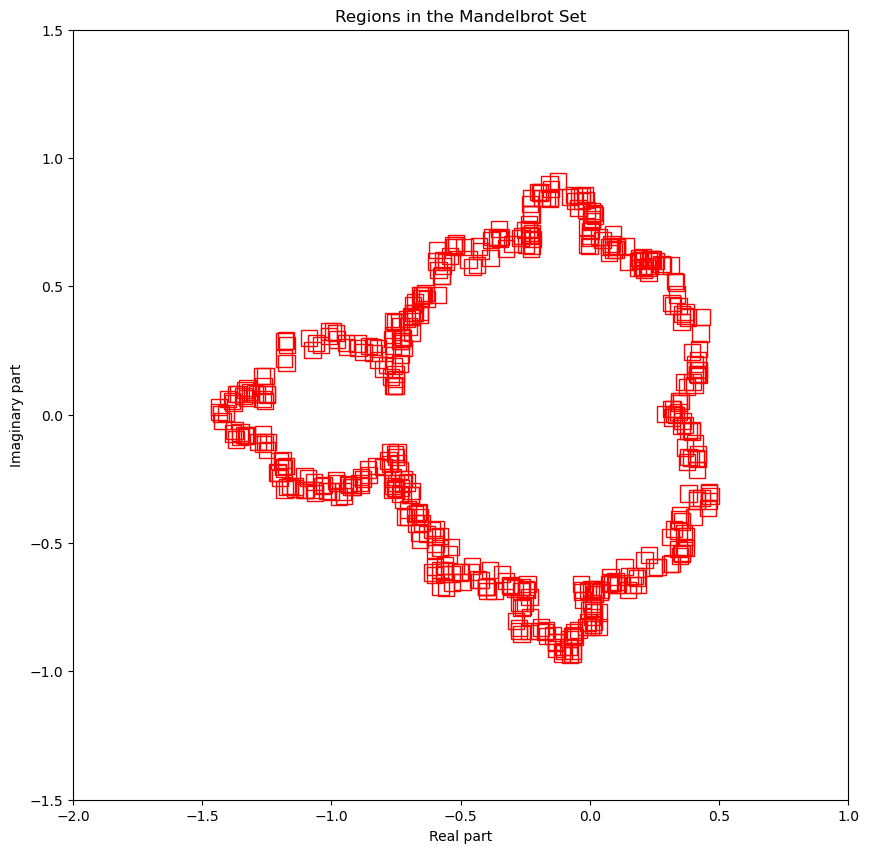

MULTIPOLYGON (((-0.7534616961501301 -0.1528604499120553, -0.762151467603669 -0.1528604499120553, -0.762151467603669 -0.1618520325970387, -0.8016058574263446 -0.1618520325970387, -0.8016058574263446 -0.2037589065988201, -0.8337092554310022 -0.2037589065988201, -0.8337092554310022 -0.2086916588892223, -0.8363676765961319 -0.2086916588892223, -0.8363676765961319 -0.2140037399854315, -0.8481252810683193 -0.2140037399854315, -0.8481252810683193 -0.2446738234683233, -0.8621727237531459 -0.2446738234683233, -0.8621727237531459 -0.2452003146108133, -0.8914775800622117 -0.2452003146108133, -0.8914775800622117 -0.2757177793499802, -0.9544729702385344 -0.2757177793499802, -0.9544729702385344 -0.2638843115920633, -0.9597815353662456 -0.2638843115920633, -0.9597815353662456 -0.2654334438910086, -0.9758833038897137 -0.2654334438910086, -0.9758833038897137 -0.2773451118507229, -1.0388786940660364 -0.2773451118507229, -1.0388786940660364 -0.2763048055137555, -1.0512556255034615 -0.2763048055137555, -1

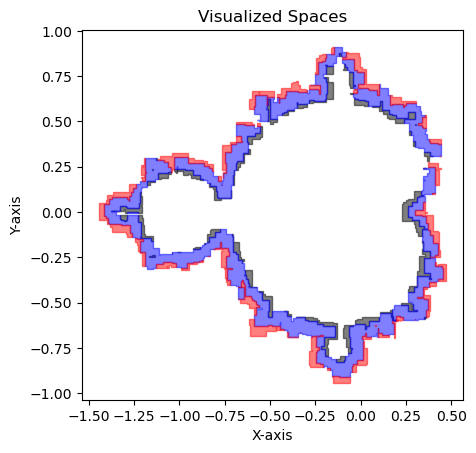

circle 10
(-1.4157744874615055, -0.9087744604484967, 0.4526286368433073, 0.9116243593485698)


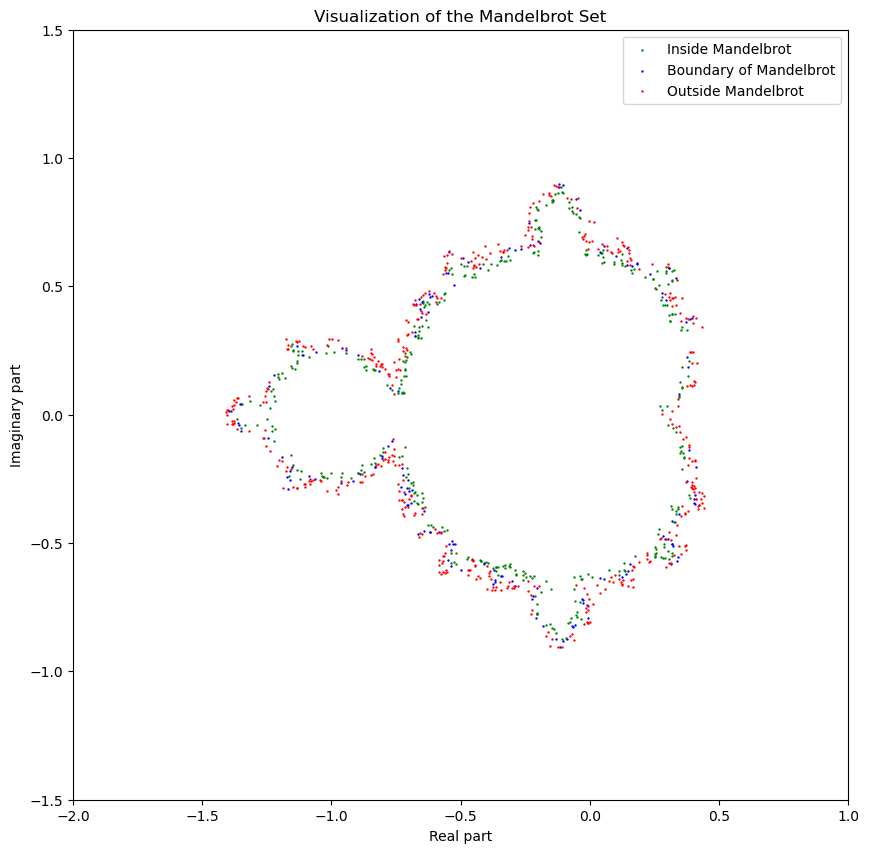

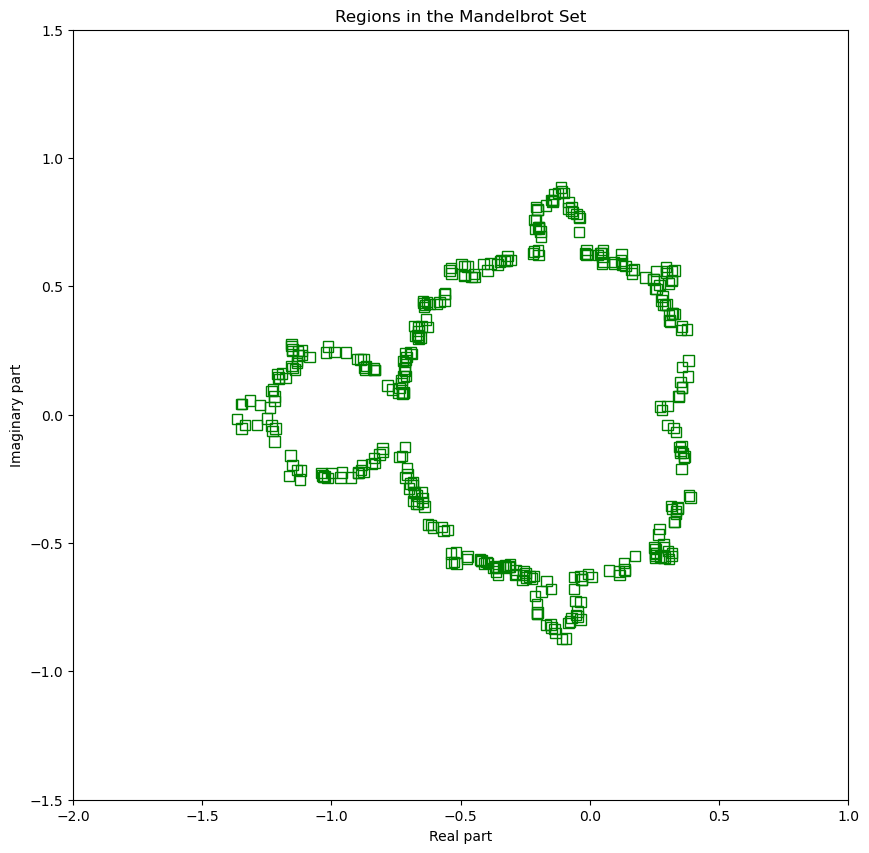

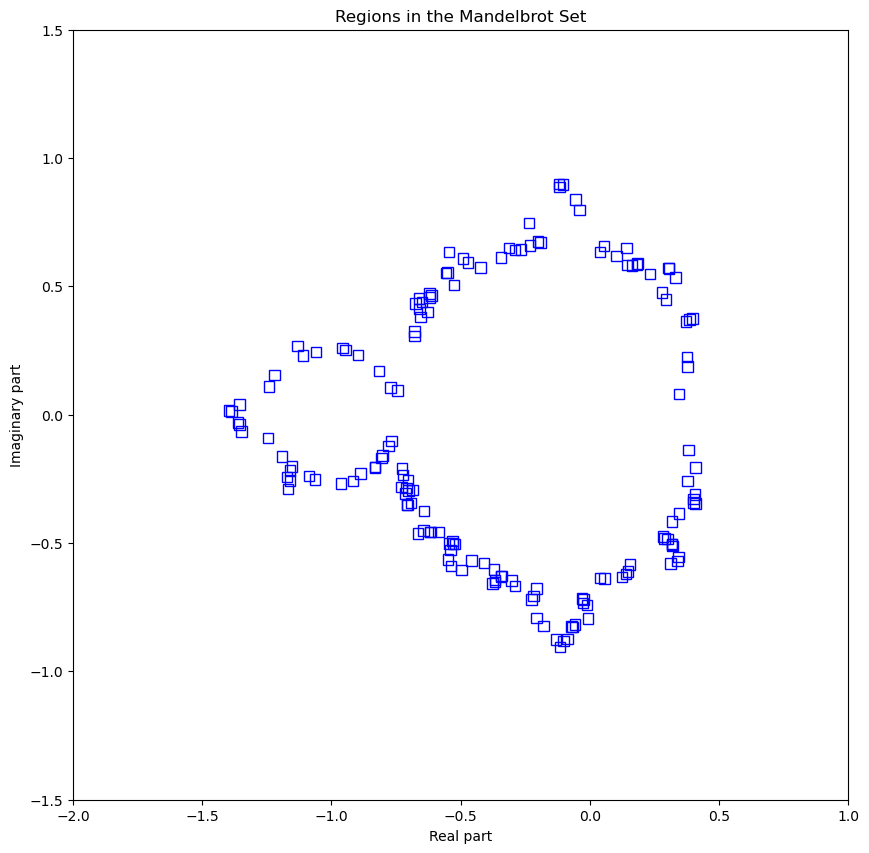

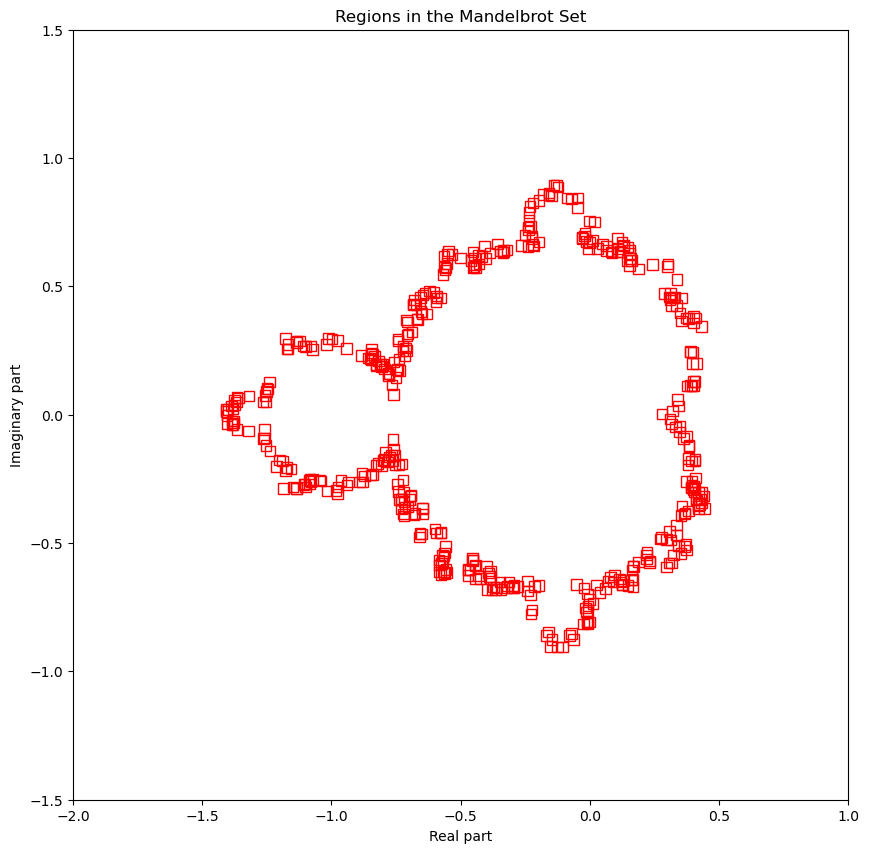

MULTIPOLYGON (((-1.1852278481159306 -0.217549360300092, -1.1534308951824737 -0.217549360300092, -1.1534308951824737 -0.2166470520570238, -1.170054801384888 -0.2166470520570238, -1.170054801384888 -0.1787327351921648, -1.1782545338515955 -0.1787327351921648, -1.1782545338515955 -0.1439940322974559, -1.157234911151073 -0.1439940322974559, -1.157234911151073 -0.1591461817017353, -1.1535675621312929 -0.1591461817017353, -1.1535675621312929 -0.1605080248111624, -1.1464018664780118 -0.1605080248111624, -1.1464018664780118 -0.1667607589411813, -1.1464018664780118 -0.1700854988441483, -1.1464018664780118 -0.1760680586607936, -1.1464018664780118 -0.1950314962808336, -1.1464018664780118 -0.2004188271816981, -1.1454312164298135 -0.2004188271816981, -1.1282677338751088 -0.2004188271816981, -1.1137885901476003 -0.2004188271816981, -1.1137885901476003 -0.2046118002068161, -1.1137885901476003 -0.2081839445909117, -1.1137885901476003 -0.238414136524871, -1.1113309121295083 -0.238414136524871, -1.10661

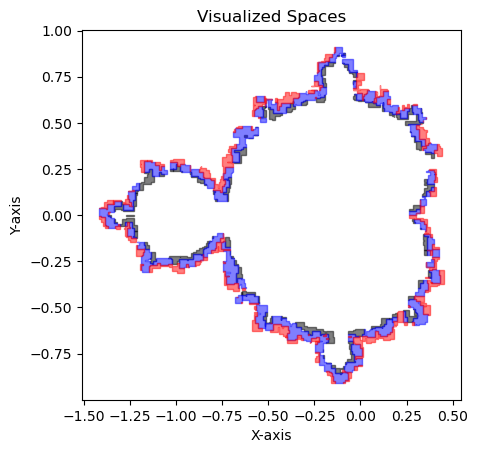

circle 11
(-1.4157744874615055, -0.9087744604484967, 0.4299027185425603, 0.9116243593485698)


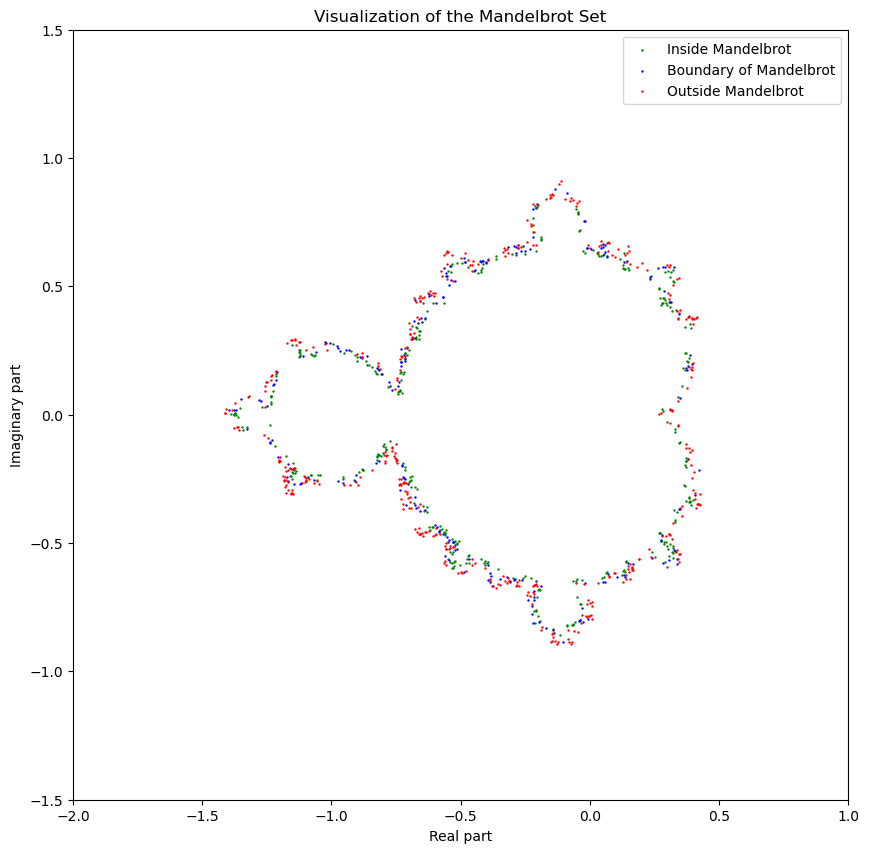

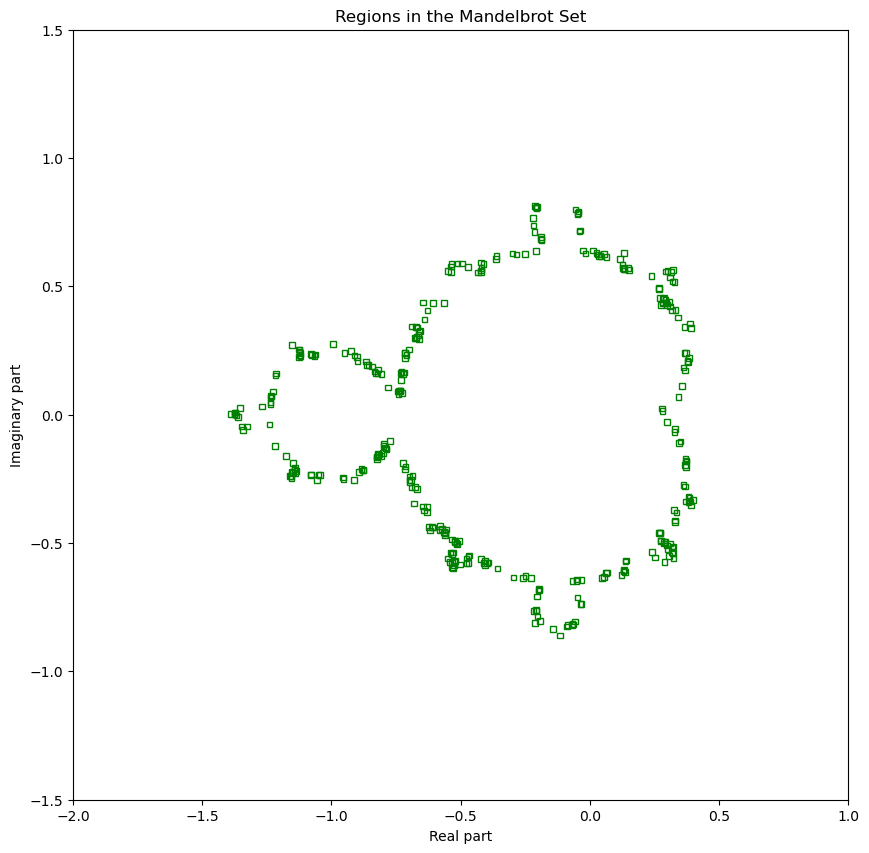

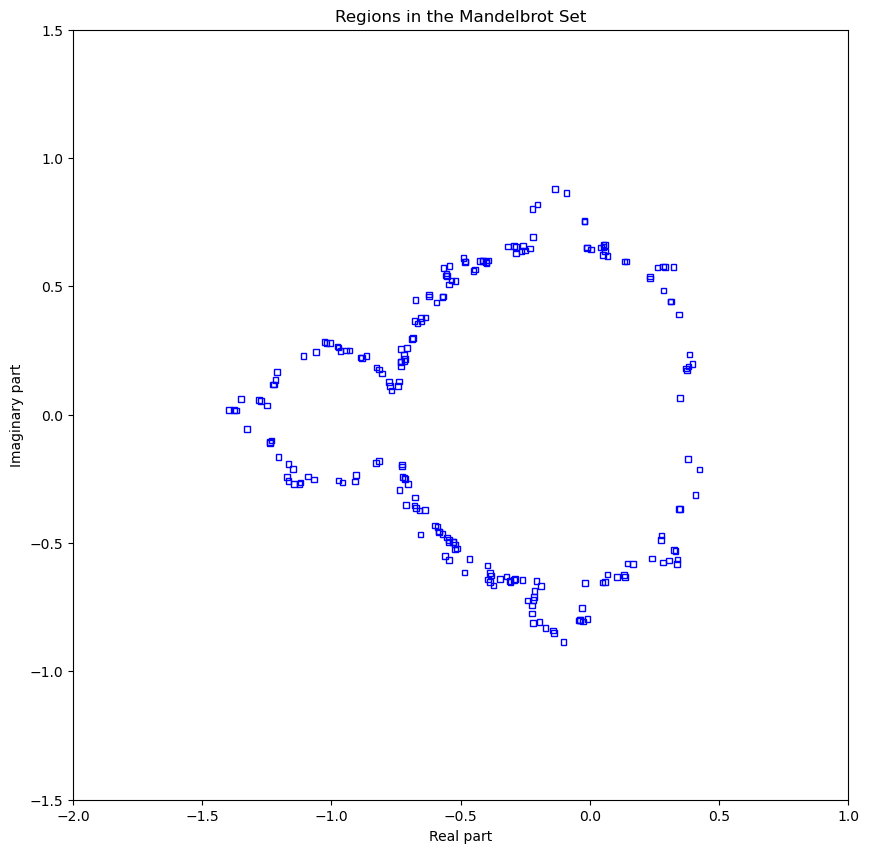

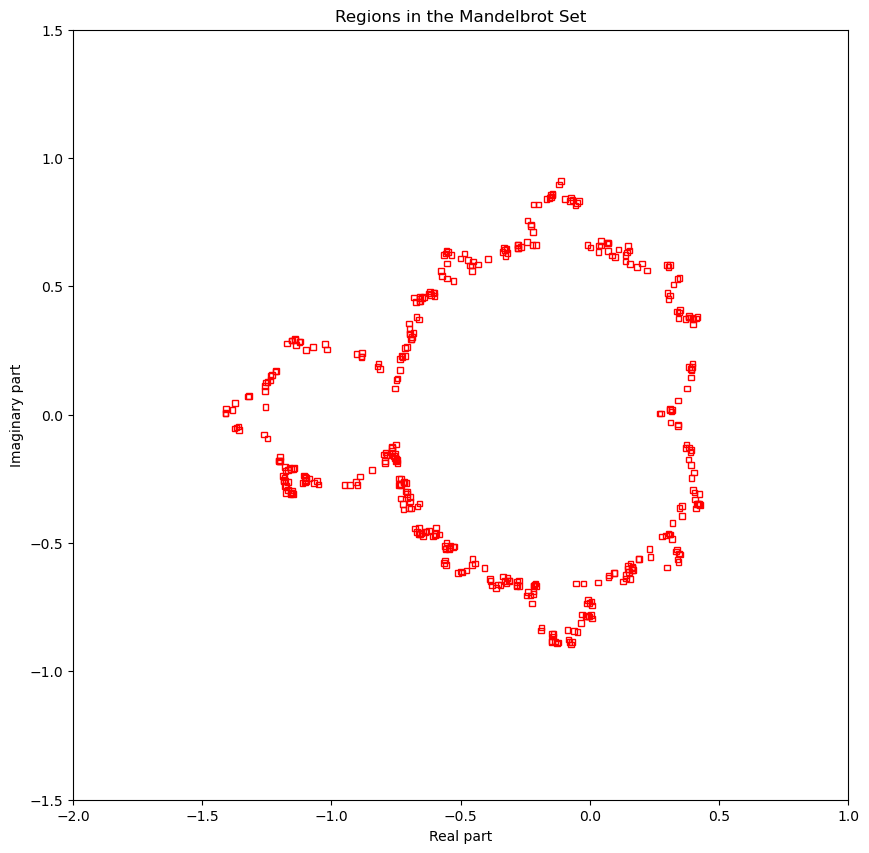

MULTIPOLYGON (((-0.9239029394581598 -0.2431273082107164, -0.9021189440446059 -0.2431273082107164, -0.9021189440446059 -0.2649113036242703, -0.9239029394581598 -0.2649113036242703, -0.9239029394581598 -0.2431273082107164)), ((-1.0323625903323461 -0.245379314594961, -1.0444604956856467 -0.245379314594961, -1.0444604956856467 -0.2645671684540475, -1.0662444910992006 -0.2645671684540475, -1.0662444910992006 -0.2427831730404936, -1.0611561349867953 -0.2427831730404936, -1.0611561349867953 -0.2328475167694211, -1.0591800716705009 -0.2328475167694211, -1.0514485246256975 -0.2328475167694211, -1.0432830270467208 -0.2328475167694211, -1.0432830270467208 -0.2343531011919694, -1.0323625903323461 -0.2343531011919694, -1.0323625903323461 -0.245379314594961)), ((-0.9425544694796315 -0.2386302529959591, -0.9425544694796315 -0.260414248409513, -0.9643384648931854 -0.260414248409513, -0.9643384648931854 -0.2548313800540458, -0.9659272812642359 -0.2548313800540458, -0.9659272812642359 -0.236389264221770

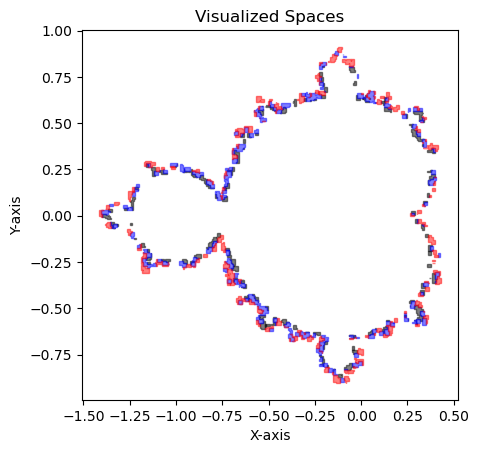

circle 12
(-1.4061073703176, -0.89615627821384, 0.4255527038148142, 0.8904644523090025)


KeyboardInterrupt: 

In [83]:
x_range = [-2, 1]
y_range = [-1.5, 1.5]
num_samples = 1000
max_iter = 2000
init_area_of_sample = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
init_space = MultiPolygon([box(x_range[0], y_range[0], x_range[1], y_range[1])])


sampletime = 20
aim_samplesize = []
true_samplesize = []
inside = []
outside = []
boundary = []
for i in range(sampletime):
    if i == 0:
        current_sample_space = init_space
        current_area_size = init_area_of_sample
    else:
        current_sample_space = adjusted_boundary_space
        current_area_size = adjusted_boundary_space.area

    aim_samplesize.append(current_sample_space)
    iteration_threshold = (i + 1) * 5
    print(f"circle {i+1}")
    side_length = current_area_size / 10
    inside_mandelbrot, boundary_points , outside_mandelbrot= random_sampling(current_sample_space, 
                                                    num_samples, max_iter, iteration_threshold)

    plt.figure(figsize=(10, 10))

    # Plot each set of points with different colors
    plt.scatter(inside_mandelbrot.real, inside_mandelbrot.imag, color='green', s=0.5, label='Inside Mandelbrot')
    plt.scatter(boundary_points.real, boundary_points.imag, color='blue', s=0.5, label='Boundary of Mandelbrot')
    plt.scatter(outside_mandelbrot.real, outside_mandelbrot.imag, color='red', s=0.5, label='Outside Mandelbrot')

    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.title('Visualization of the Mandelbrot Set')
    plt.xlabel('Real part')
    plt.ylabel('Imaginary part')
    plt.legend()
    plt.show()

    inside_mandelbrot_squares = define_regions(inside_mandelbrot, side_length)
    boundary_squares = define_regions(boundary_points, side_length)  # 0.1 is the length of the side of the square area
    outside_mandelbrot_squares = define_regions(outside_mandelbrot, side_length)
    def visualize_regions(squares, color):
        fig, ax = plt.subplots(figsize=(10, 10))

        # Draw each square
        for square in squares:
            left, right, bottom, top = square
            square_patch = plt.Rectangle((left, bottom), right - left, top - bottom, 
                                        edgecolor=color, facecolor='none')
            ax.add_patch(square_patch)

        ax.set_xlim(x_range)
        ax.set_ylim(y_range)
        plt.xlabel('Real part')
        plt.ylabel('Imaginary part')
        plt.title('Regions in the Mandelbrot Set')
        plt.show()

    # Visualize each set of regions
    visualize_regions(inside_mandelbrot_squares, 'green')
    visualize_regions(boundary_squares, 'blue')
    visualize_regions(outside_mandelbrot_squares, 'red')

    #????????????
    inside_space = merge_squares(inside_mandelbrot_squares, current_sample_space)
    boundary_space = merge_squares(boundary_squares, current_sample_space)
    outside_space = merge_squares(outside_mandelbrot_squares, current_sample_space)
    
    print(inside_space)
    print(boundary_space)
    print(current_sample_space)
    
    adjusted_inside_space, adjusted_boundary_space, adjusted_outside_space = adjust_spaces(inside_space,
                                                        boundary_space, outside_space, current_sample_space)
    inside.append(adjusted_inside_space.area)
    boundary.append(adjusted_boundary_space.area)
    outside.append(adjusted_outside_space.area)
    
    print(f"Adjusted Inside Mandelbrot Set Area: {adjusted_inside_space.area}")
    print(f"Adjusted Boundary of Mandelbrot Set Area: {adjusted_boundary_space.area}")
    print(f"Adjusted Outside Mandelbrot Set Area: {adjusted_outside_space.area}")

    exact_sample_area = adjusted_inside_space.area + adjusted_boundary_space.area + adjusted_outside_space.area
    true_samplesize.append(exact_sample_area)
    print(f"Mandelbrot set {sum(inside)}")


    fig, ax = plt.subplots()
    # 可视化三个区域
    visualize_space(adjusted_inside_space, ax, color='black')   # 内部空间为绿色
    visualize_space(adjusted_boundary_space, ax, color='blue')  # 边界空间为蓝色
    visualize_space(adjusted_outside_space, ax, color='red')    # 外部空间为红色

    # 设置图像的x和y边界
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Visualized Spaces')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

